### Background Project

In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer

**Evaluation**

The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as:
[\sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2}]
where:

𝑛
 is the total number of instances,
𝑦̂ 𝑖
 is the predicted value of the target for instance (i),
𝑦𝑖
 is the actual value of the target for instance (i), and,
log
 is the natural logarithm.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os


In [2]:
import datetime as dt

In [3]:
from datetime import datetime as dt

In [4]:
seed = 42

sns.set_style('darkgrid')
sns.set_palette('RdBu')


In [5]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
def index_date(data):
    data["date"] = pd.to_datetime(data["date"])
    data.set_index(data["date"], inplace=True)
    data.drop("date", axis=1, inplace=True)


### Load datset

#### Read the data

In [7]:
train = pd.read_csv("dataset/train.csv")

In [8]:
dataset = ["train", "test", "oil", "holidays_events", "stores", "transactions"]

In [9]:
for data in dataset:
    print(data)
    exec("{} = pd.read_csv('dataset/{}.csv')".format(data, data))

train
test
oil
holidays_events
stores
transactions


#### explore data

#### train data

In [10]:
train.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


#### transactioin data

In [12]:
transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


#### stores data

In [14]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [15]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


#### oil data

In [16]:
oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [17]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


#####  holidays_events data

In [18]:
holidays_events.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [19]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


### EDA

#### Cleaning The data

we need to check if there is no missing days in the some dataset like train, oil, and transactions dataset

In [20]:
oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [21]:
min_date = train["date"].min()
max_date = train["date"].max()

In [22]:
pd.date_range(start=min_date, end=max_date).difference(train["date"])

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

there are missing days train dataset, we will see later for the result what should we do when doing forecasting

we have those missing date or days in train date 

In [23]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [24]:
train.duplicated().sum()

0

In [25]:
index_date(train)

In [26]:
test.head()

id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

In [27]:
index_date(test)

In [28]:
index_date(transactions)

#### Analysis by sales data

In [29]:
dataset

['train', 'test', 'oil', 'holidays_events', 'stores', 'transactions']

In [30]:
transactions.tail()

store_nbr  transactions
date                               
2017-08-15         50          2804
2017-08-15         51          1573
2017-08-15         52          2255
2017-08-15         53           932
2017-08-15         54           802

In [31]:
transactions.head()

store_nbr  transactions
date                               
2013-01-01         25           770
2013-01-02          1          2111
2013-01-02          2          2358
2013-01-02          3          3487
2013-01-02          4          1922

In [32]:
satu = train.loc["2013-01-02", :]

In [33]:
satu.head()

id  store_nbr      family   sales  onpromotion
date                                                        
2013-01-02  1782          1  AUTOMOTIVE     2.0            0
2013-01-02  1783          1   BABY CARE     0.0            0
2013-01-02  1784          1      BEAUTY     2.0            0
2013-01-02  1785          1   BEVERAGES  1091.0            0
2013-01-02  1786          1       BOOKS     0.0            0

In [34]:
satu[satu["store_nbr"] == 1].shape

(33, 5)

In [35]:
satu.shape

(1782, 5)

In [36]:
satu.head()

id  store_nbr      family   sales  onpromotion
date                                                        
2013-01-02  1782          1  AUTOMOTIVE     2.0            0
2013-01-02  1783          1   BABY CARE     0.0            0
2013-01-02  1784          1      BEAUTY     2.0            0
2013-01-02  1785          1   BEVERAGES  1091.0            0
2013-01-02  1786          1       BOOKS     0.0            0

In [37]:
transactions.loc["2013-01-02", :].head()

store_nbr  transactions
date                               
2013-01-02          1          2111
2013-01-02          2          2358
2013-01-02          3          3487
2013-01-02          4          1922
2013-01-02          5          1903

In [38]:
satu[satu["store_nbr"] == 25].sum()

id                                                         77847
store_nbr                                                    825
family         AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...
sales                                                   5316.224
onpromotion                                                    0
dtype: object

In [39]:
train.head()

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

In [40]:
transactions.loc["2013-01-02", :].head()

store_nbr  transactions
date                               
2013-01-02          1          2111
2013-01-02          2          2358
2013-01-02          3          3487
2013-01-02          4          1922
2013-01-02          5          1903

In [41]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

#### Analysis sale by store

In [42]:
transactions.index.min(), transactions.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [43]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [44]:
stores.shape

(54, 5)

In [45]:
print(f'there are {stores["cluster"].nunique()} clusters')

there are 17 clusters


In [46]:
stores["type"].value_counts().sort_index()

A     9
B     8
C    15
D    18
E     4
Name: type, dtype: int64

In [47]:
stores["city"].value_counts().sort_index()

Ambato            2
Babahoyo          1
Cayambe           1
Cuenca            3
Daule             1
El Carmen         1
Esmeraldas        1
Guaranda          1
Guayaquil         8
Ibarra            1
Latacunga         2
Libertad          1
Loja              1
Machala           2
Manta             2
Playas            1
Puyo              1
Quevedo           1
Quito            18
Riobamba          1
Salinas           1
Santo Domingo     3
Name: city, dtype: int64

<AxesSubplot: >

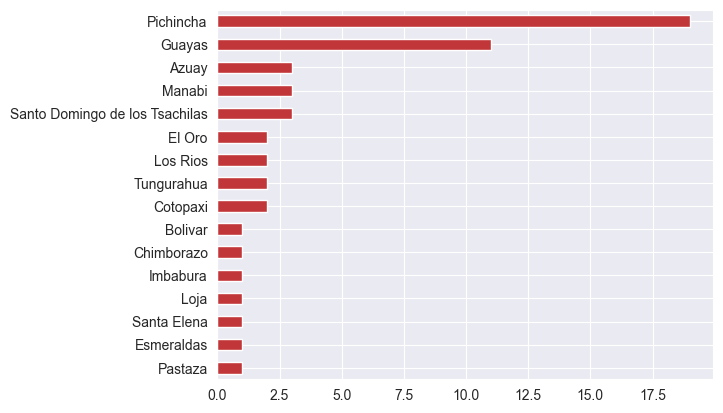

In [48]:
stores["state"].value_counts().sort_values().plot(kind='barh')

### maybe you can add anotate to the bar

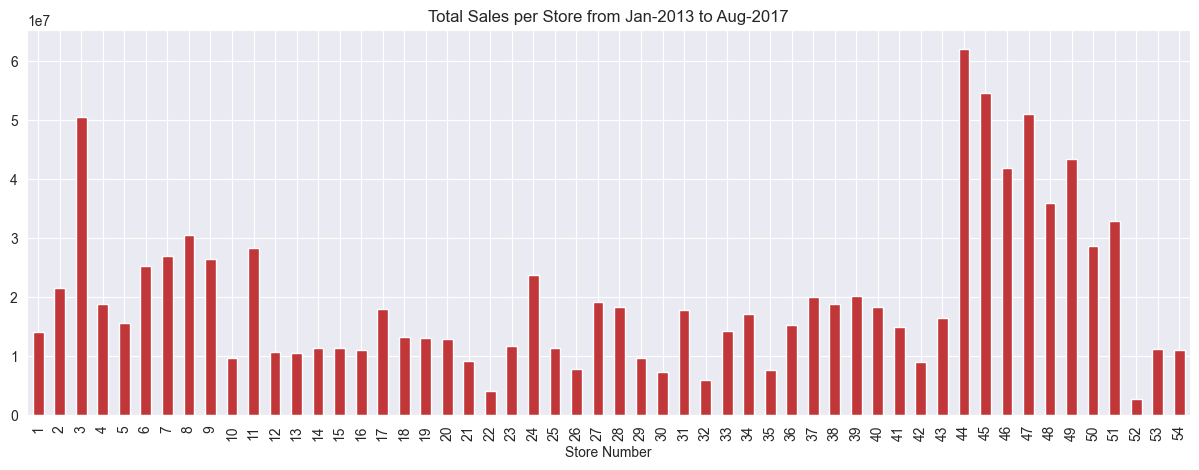

In [49]:
train.groupby("store_nbr")["sales"].sum().plot(kind="bar", figsize=(15, 5))

plt.title("Total Sales per Store from Jan-2013 to Aug-2017")
plt.xlabel("Store Number")
plt.show()


In [50]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [51]:
train_sales = train.groupby("store_nbr")["sales"].sum()

In [52]:
stores_merge = stores.merge(train_sales, left_on="store_nbr", right_index=True)

In [53]:
stores_merge[stores_merge["sales"] > 3*10**7]

store_nbr       city      state type  cluster         sales
2           3      Quito  Pichincha    D        8  5.048191e+07
7           8      Quito  Pichincha    D        8  3.049429e+07
43         44      Quito  Pichincha    A        5  6.208755e+07
44         45      Quito  Pichincha    A       11  5.449801e+07
45         46      Quito  Pichincha    A       14  4.189606e+07
46         47      Quito  Pichincha    A       14  5.094831e+07
47         48      Quito  Pichincha    A       14  3.593313e+07
48         49      Quito  Pichincha    A       11  4.342010e+07
50         51  Guayaquil     Guayas    A       17  3.291149e+07

just for note if we dont have transactions data for testind date range. this is can make as confident to dont use the transactions data

<AxesSubplot: xlabel='store_nbr'>

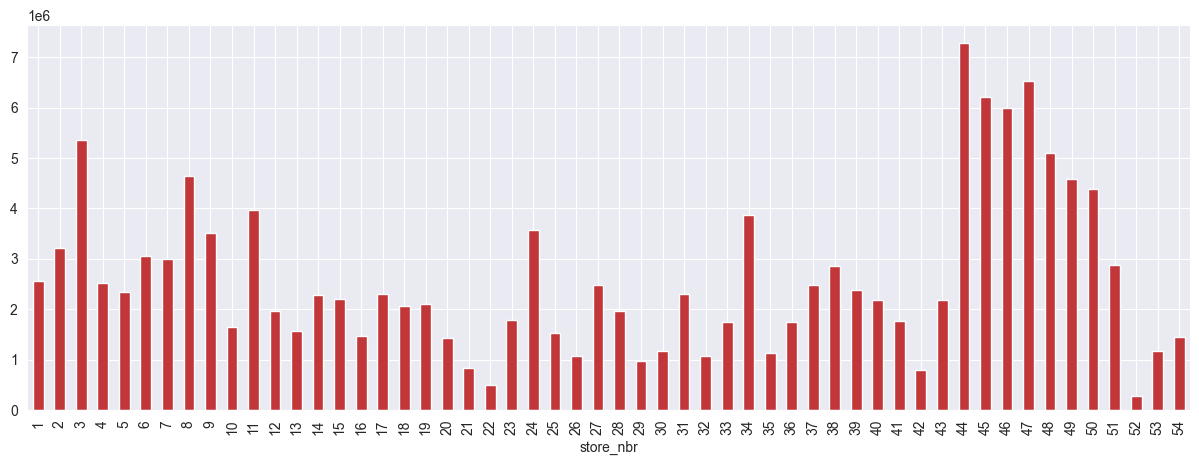

In [54]:
transactions.groupby("store_nbr")["transactions"].sum().plot(kind="bar", figsize=(15, 5))

In [55]:
stores["city"].value_counts().sort_index()

Ambato            2
Babahoyo          1
Cayambe           1
Cuenca            3
Daule             1
El Carmen         1
Esmeraldas        1
Guaranda          1
Guayaquil         8
Ibarra            1
Latacunga         2
Libertad          1
Loja              1
Machala           2
Manta             2
Playas            1
Puyo              1
Quevedo           1
Quito            18
Riobamba          1
Salinas           1
Santo Domingo     3
Name: city, dtype: int64

#### Do analysis by Famiiy

<AxesSubplot: ylabel='family'>

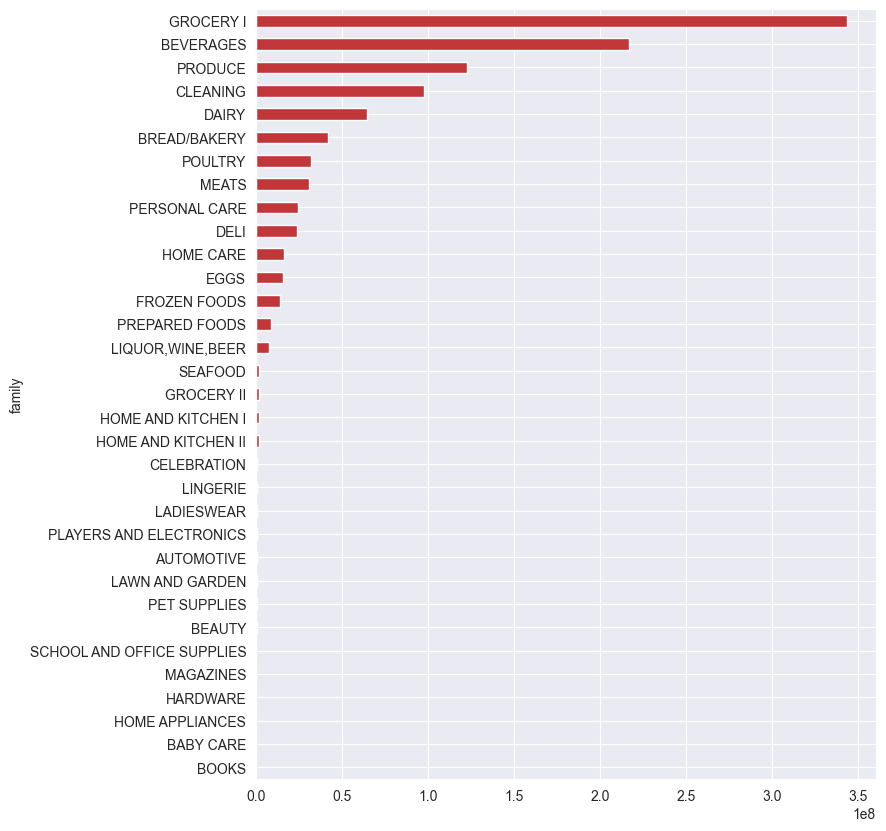

In [56]:
train.groupby("family")["sales"].sum().sort_values().plot(kind="barh", figsize=(8, 10))

#### Do analysis by Time Series

##### Year Sales

In [57]:
train["year"] = train.index.year
train["month"] = train.index.month
train["weekday"] = train.index.weekday
train["day"] = train.index.day
train["quarter"] = train.index.quarter

In [58]:
train["weekday"] = train["weekday"].map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

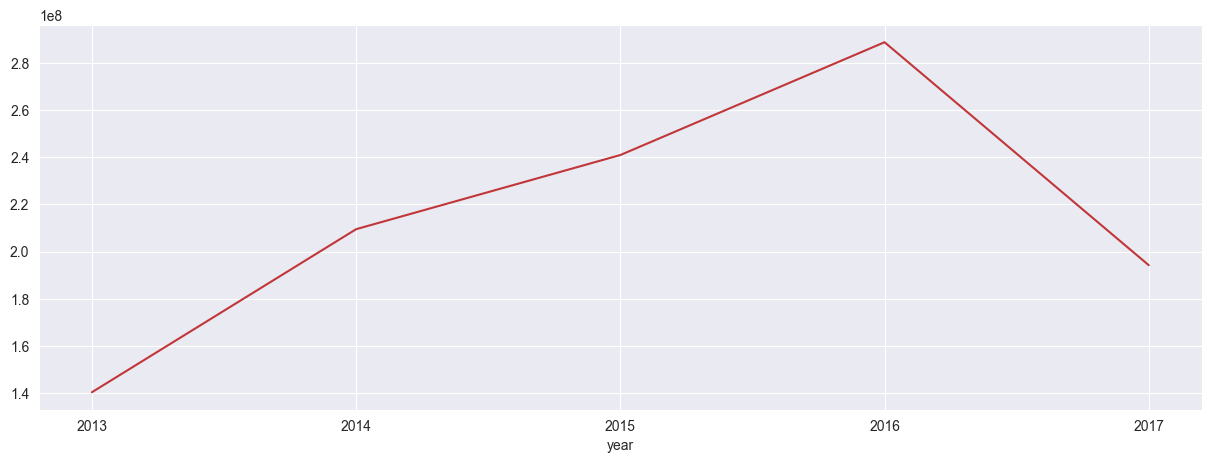

In [59]:
train.groupby("year")["sales"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(2013, 2018, 1))

plt.show()

if we see in 2017 number of sales is decrease because one of the reason is we only have data until august 2017. Then to get good analysis by agregation and visualization comparison we have to drop 2017 data first

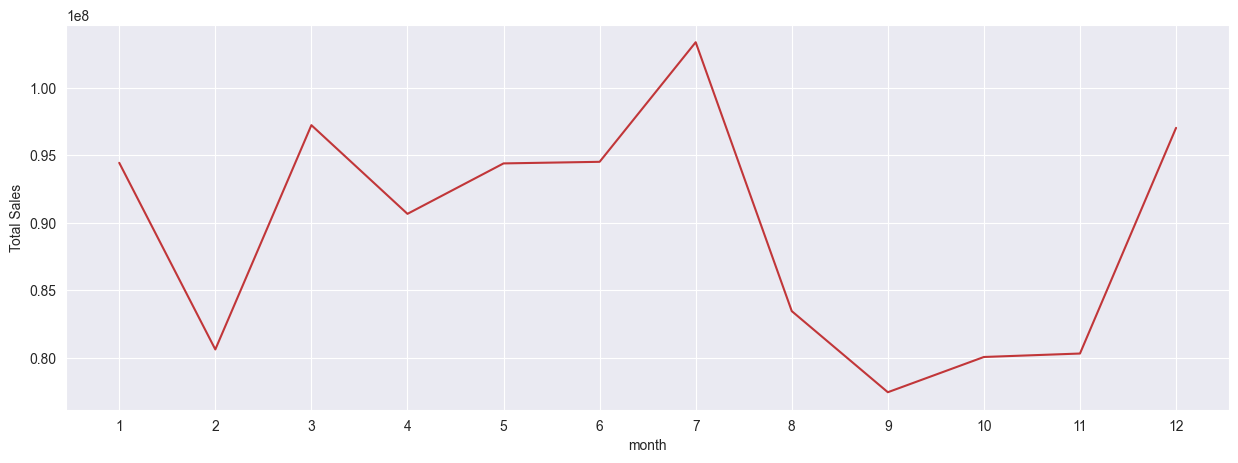

In [60]:
train.groupby("month")["sales"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(1, 13))
plt.ylabel("Total Sales")
plt.show()

##### Drop 2017 Data

In [61]:
train_viz = train.loc[train["year"] != 2017]

##### Revisualize the data

In [62]:
train_viz.head()

id  store_nbr      family  sales  onpromotion  year  month  \
date                                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0  2013      1   
2013-01-01   1          1   BABY CARE    0.0            0  2013      1   
2013-01-01   2          1      BEAUTY    0.0            0  2013      1   
2013-01-01   3          1   BEVERAGES    0.0            0  2013      1   
2013-01-01   4          1       BOOKS    0.0            0  2013      1   

            weekday  day  quarter  
date                               
2013-01-01  Tuesday    1        1  
2013-01-01  Tuesday    1        1  
2013-01-01  Tuesday    1        1  
2013-01-01  Tuesday    1        1  
2013-01-01  Tuesday    1        1

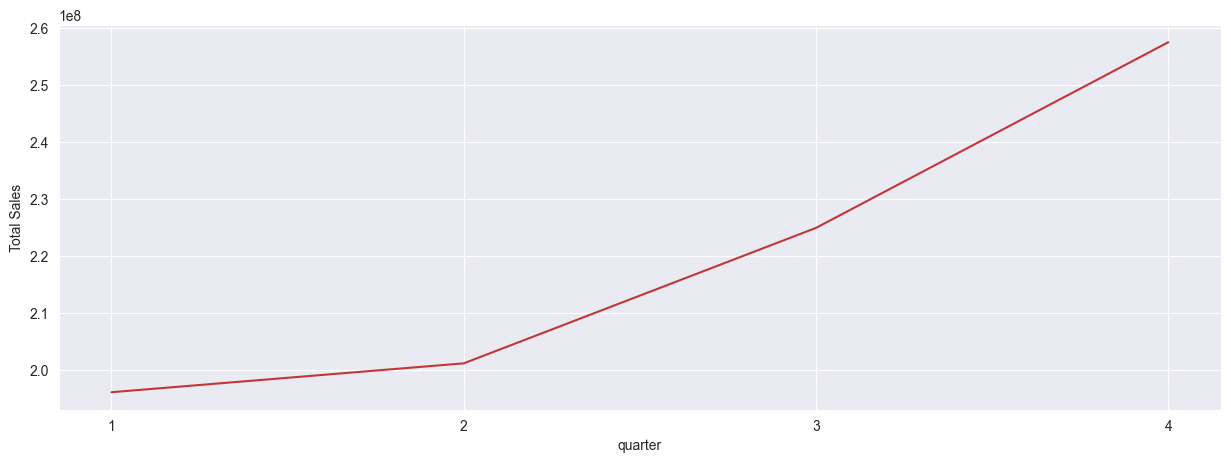

In [63]:
train_viz.groupby("quarter")["sales"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 5))                                       
plt.ylabel("Total Sales")

plt.show()

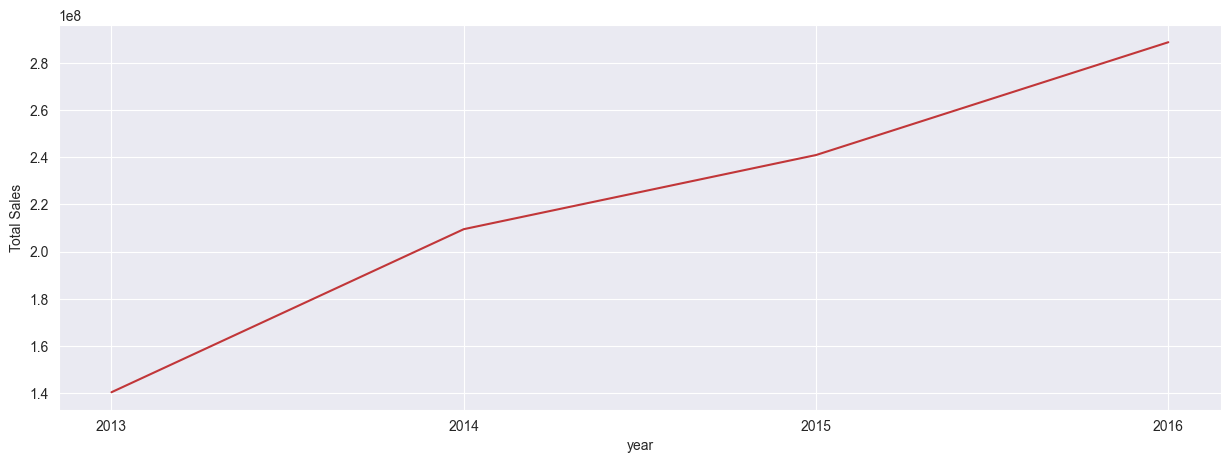

In [64]:
train_viz.groupby("year")["sales"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(2013, 2017, 1))
plt.ylabel("Total Sales")
plt.show()

In [65]:
train_viz.head()

id  store_nbr      family  sales  onpromotion  year  month  \
date                                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0  2013      1   
2013-01-01   1          1   BABY CARE    0.0            0  2013      1   
2013-01-01   2          1      BEAUTY    0.0            0  2013      1   
2013-01-01   3          1   BEVERAGES    0.0            0  2013      1   
2013-01-01   4          1       BOOKS    0.0            0  2013      1   

            weekday  day  quarter  
date                               
2013-01-01  Tuesday    1        1  
2013-01-01  Tuesday    1        1  
2013-01-01  Tuesday    1        1  
2013-01-01  Tuesday    1        1  
2013-01-01  Tuesday    1        1

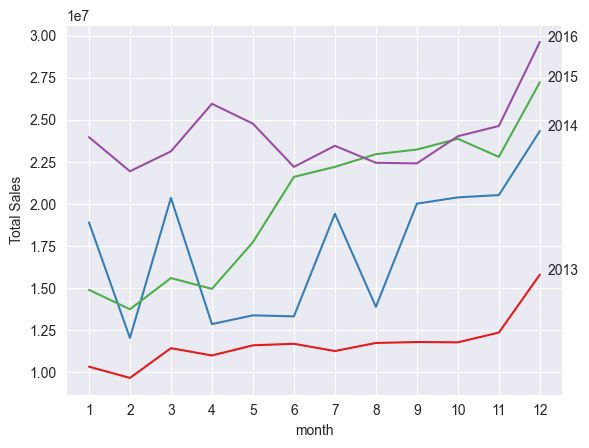

In [66]:
year = train_viz.groupby(["year","month"])["sales"].sum().reset_index()

sns.lineplot(x="month", y="sales", hue="year", data=year, palette="Set1", legend = False)


for year_value in year["year"].unique():
    subset = year[year["year"] == year_value]
    last_point = subset.tail(1)
    plt.annotate(year_value, xy=(last_point["month"].values[0], last_point["sales"].values[0]),
                 xytext=(last_point["month"].values[0] + 0.2, last_point["sales"].values[0]))


plt.xticks(np.arange(1, 13))
plt.ylabel("Total Sales")


plt.show()

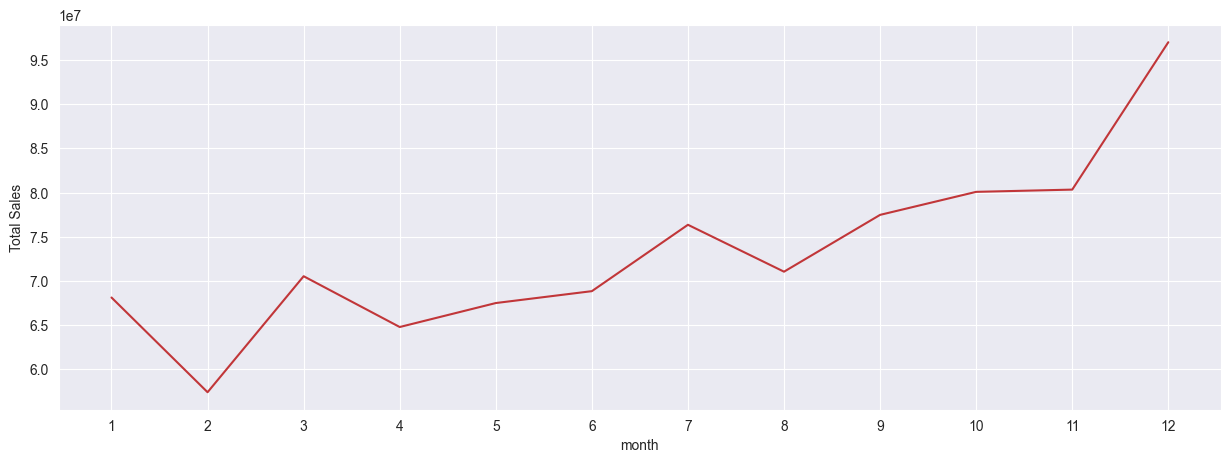

In [67]:
train_viz.groupby("month")["sales"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 13))
plt.ylabel("Total Sales")

plt.show()

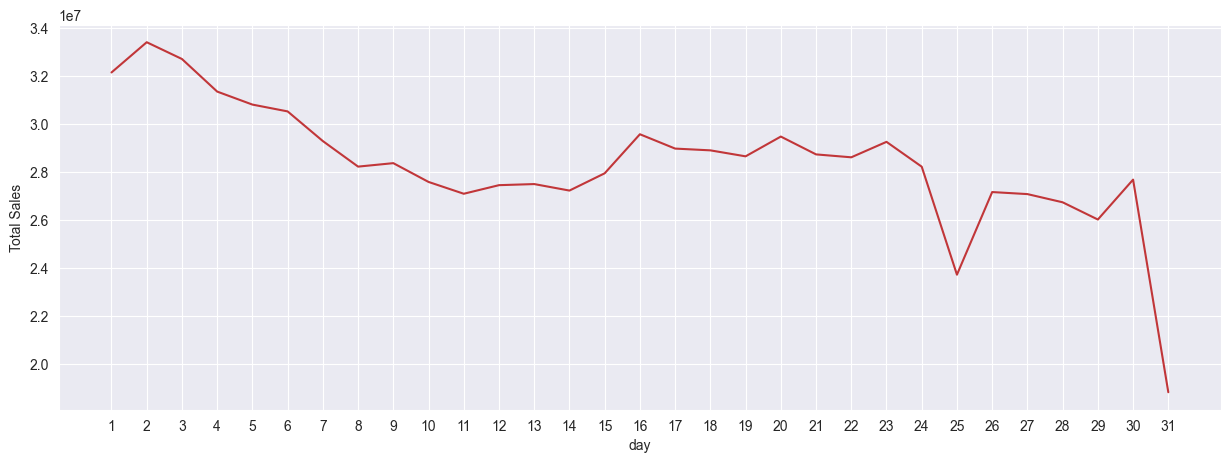

In [68]:
train_viz.groupby("day")["sales"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 32))
plt.ylabel("Total Sales")
plt.show()

In [69]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

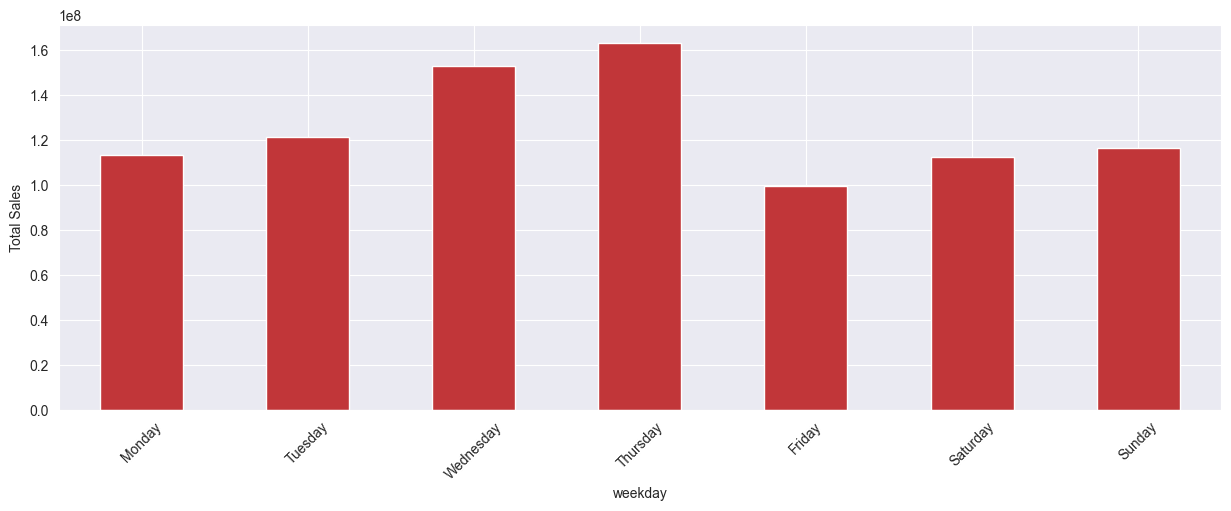

In [70]:
train_viz.groupby("weekday")["sales"].sum().plot(kind="bar", figsize=(15, 5))
plt.xticks(range(len(weekday_order)), weekday_order, rotation=45)

plt.ylabel("Total Sales")

plt.show()

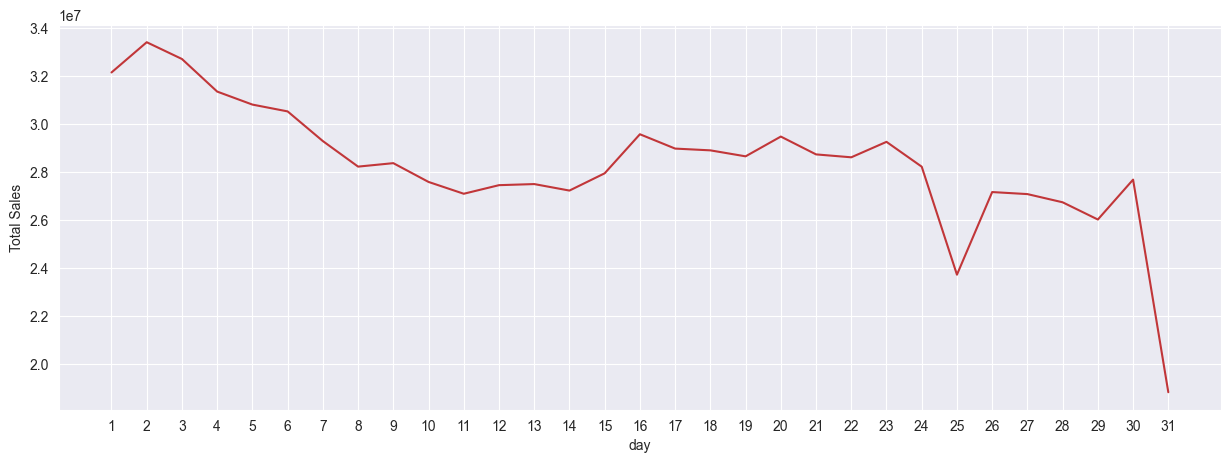

In [71]:
train_viz.groupby("day")["sales"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(1, 32))
plt.ylabel("Total Sales")

plt.show()  

#### Do analysis by Holiday

In [72]:
holidays_events.tail()

date        type    locale locale_name description  transferred
345  2017-12-22  Additional  National     Ecuador   Navidad-3        False
346  2017-12-23  Additional  National     Ecuador   Navidad-2        False
347  2017-12-24  Additional  National     Ecuador   Navidad-1        False
348  2017-12-25     Holiday  National     Ecuador     Navidad        False
349  2017-12-26  Additional  National     Ecuador   Navidad+1        False

In [73]:
holidays_events["type"].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [74]:
holidays_events["locale"].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64

In [75]:
holidays_events["date"].min(), holidays_events["date"].max()

('2012-03-02', '2017-12-26')

we need to drop some data like 2017 and 2012 data

In [76]:
# we drop the transferred holidays

holidays = holidays_events[holidays_events["transferred"] == False]
holidays = holidays[(holidays["date"] < "2017-01-01") & (holidays["date"] >= "2013-01-01")]


In [77]:
holidays.head()

date      type    locale locale_name  \
41  2013-01-01   Holiday  National     Ecuador   
42  2013-01-05  Work Day  National     Ecuador   
43  2013-01-12  Work Day  National     Ecuador   
44  2013-02-11   Holiday  National     Ecuador   
45  2013-02-12   Holiday  National     Ecuador   

                           description  transferred  
41                  Primer dia del ano        False  
42             Recupero puente Navidad        False  
43  Recupero puente primer dia del ano        False  
44                            Carnaval        False  
45                            Carnaval        False

In [78]:
holidays["date"] = pd.to_datetime(holidays["date"])

holidays.set_index("date", inplace=True)

In [79]:
holidays.loc[holidays.index.duplicated(keep=False)].tail()

type    locale locale_name                      description  \
date                                                                            
2016-07-24    Transfer     Local   Guayaquil  Traslado Fundacion de Guayaquil   
2016-11-12     Holiday     Local      Ambato          Independencia de Ambato   
2016-11-12    Work Day  National     Ecuador  Recupero Puente Dia de Difuntos   
2016-12-22  Additional  National     Ecuador                        Navidad-3   
2016-12-22     Holiday     Local     Salinas         Cantonizacion de Salinas   

            transferred  
date                     
2016-07-24        False  
2016-11-12        False  
2016-11-12        False  
2016-12-22        False  
2016-12-22        False

if you check there are some date that have 2 holidays in a day like national and local. So we need to drop the local one because already included in national

In [80]:
holidays["year"] = holidays.index.year
holidays["month"] = holidays.index.month
holidays["weekday"] = holidays.index.weekday
holidays["day"] = holidays.index.day



In [81]:
holidays.drop_duplicates(subset=["locale", "locale_name", "year", "month", "day"], inplace=True)


In [82]:
filtered_index = holidays[(holidays.index.duplicated(keep=False)) & (holidays["locale"] == "National")].index

holidays_filtered = holidays.drop(holidays[(holidays.index.isin(filtered_index)) & ((holidays["locale"] == "Local") | (holidays["locale"] == "Regional"))].index)


In [83]:
holidays_filtered["weekday"] = holidays_filtered["weekday"].map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

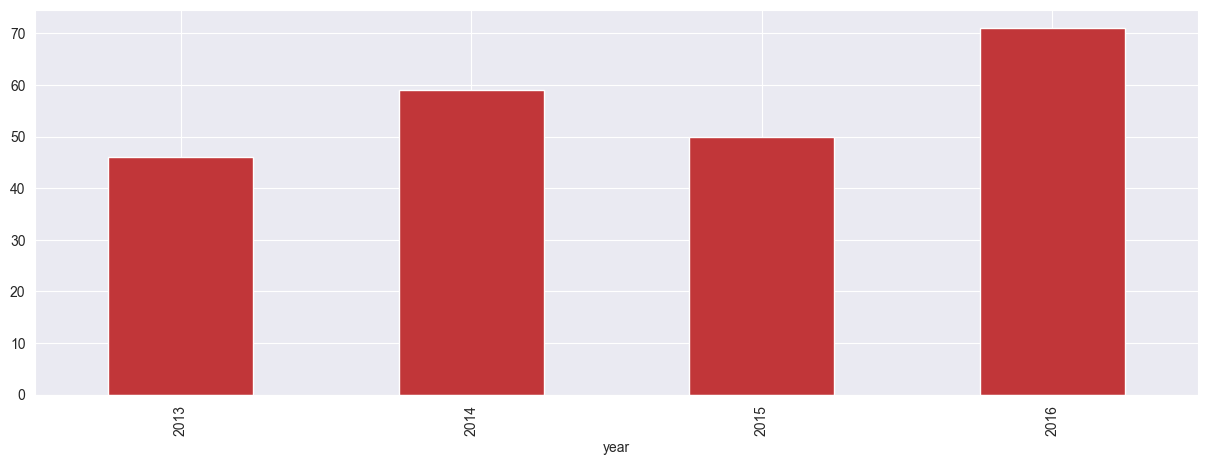

In [84]:
holidays_filtered.groupby("year")["type"].count().plot(kind="bar", figsize=(15, 5))

plt.show()

<AxesSubplot: xlabel='month'>

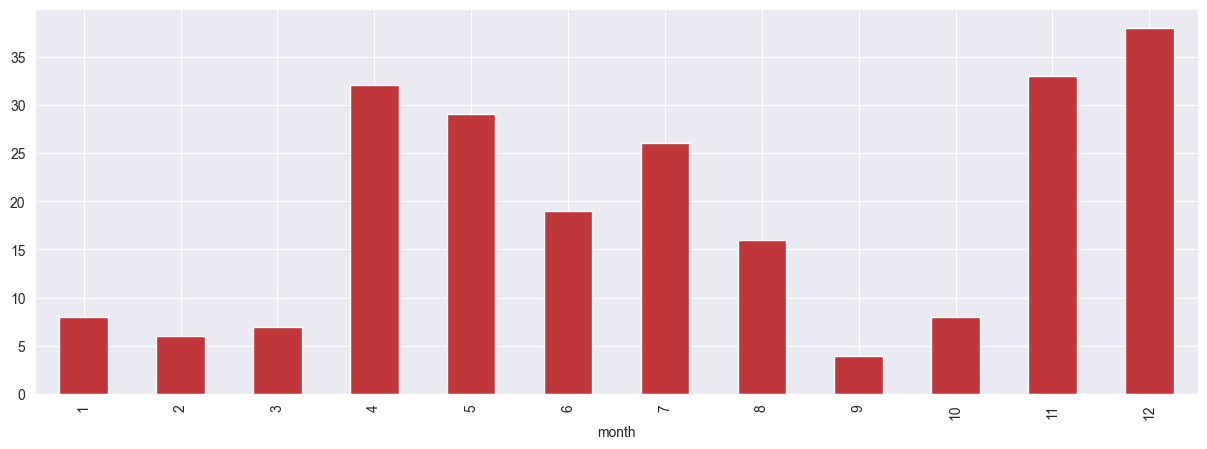

In [85]:
holidays_filtered.groupby("month")["type"].count().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='day'>

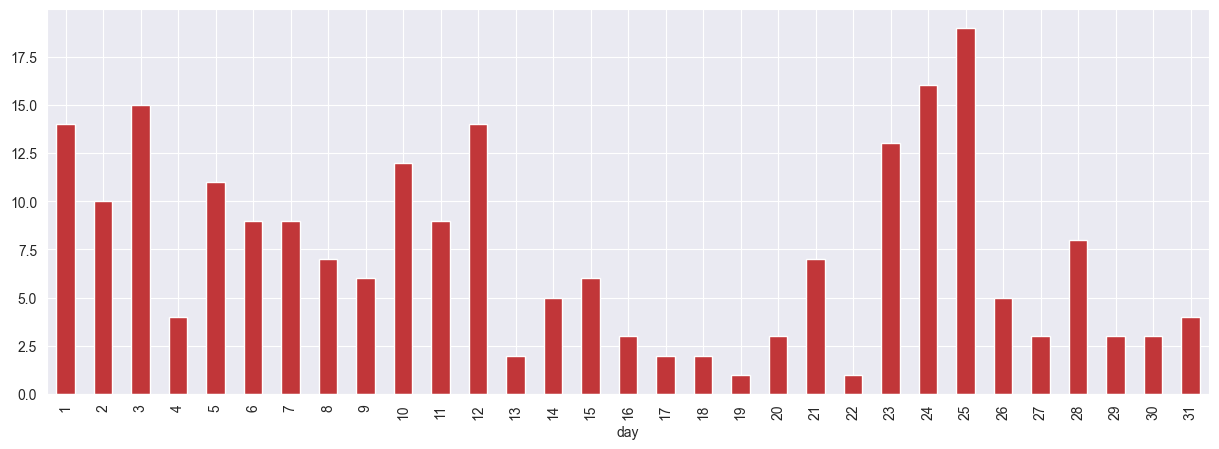

In [86]:
holidays_filtered.groupby("day")["type"].count().plot(kind="bar", figsize=(15, 5))

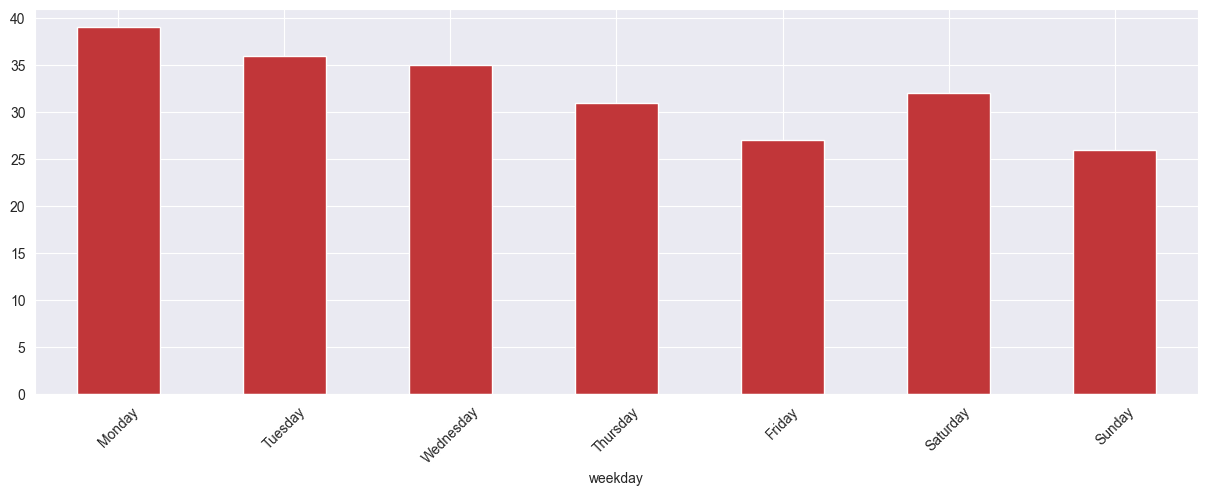

In [87]:
holidays_filtered.groupby("weekday")["type"].count().plot(kind="bar", figsize=(15, 5))

plt.xticks(range(len(weekday_order)), weekday_order, rotation=45)

plt.show()

### Do analysis on the oil price

In [88]:
oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [89]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [90]:
missing_days = pd.date_range(start='2013-01-01', end='2017-08-15').difference(oil["date"])

In [91]:
import missingno as msno

<AxesSubplot: >

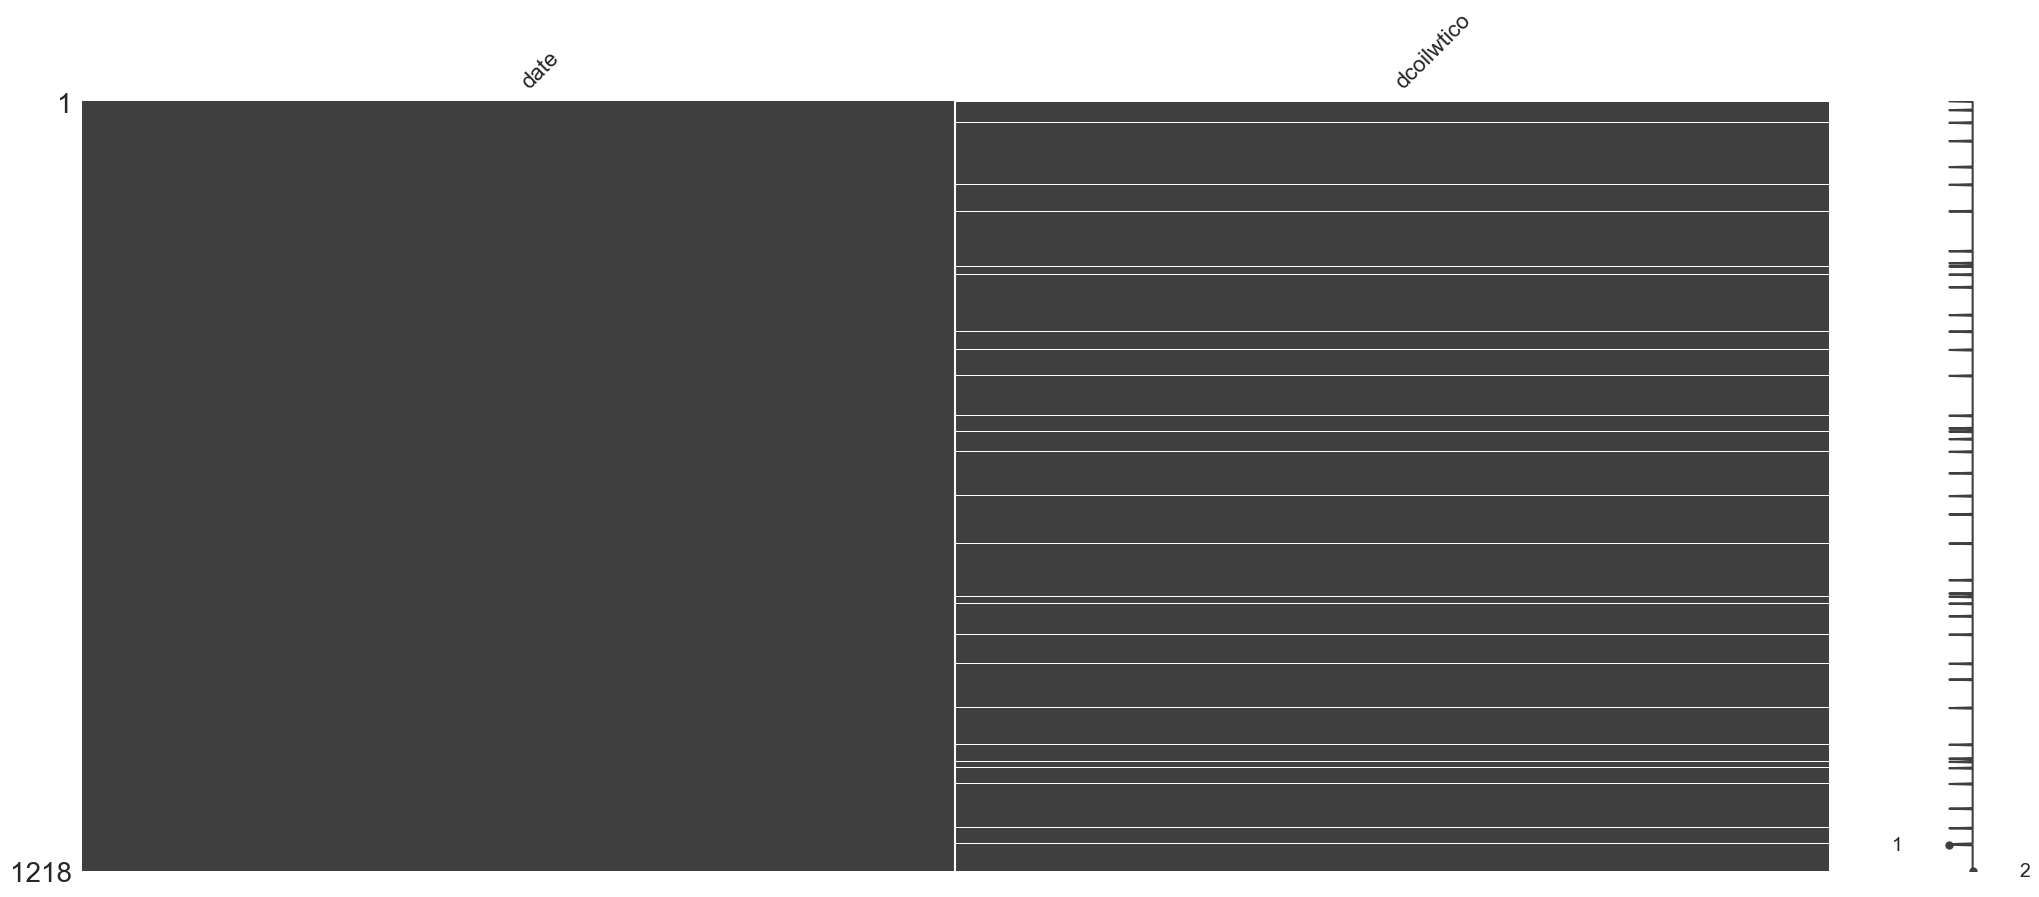

In [92]:
msno.matrix(oil)

In [93]:
index_date(oil)

<AxesSubplot: xlabel='date'>

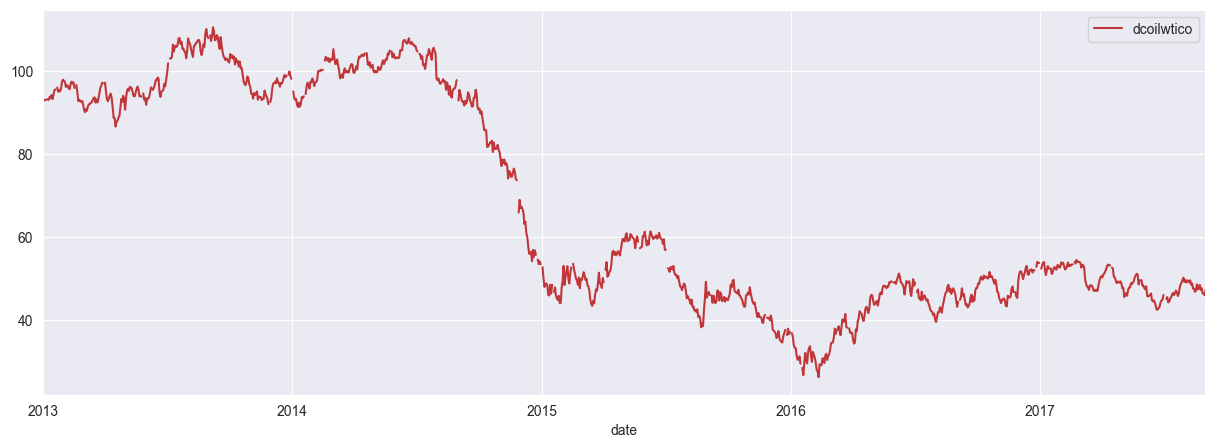

In [94]:
oil.plot(figsize=(15, 5))

there are some null values in the oil dataset and also missing days
we will use interpolate to fill na value and also for missing days we will treat when we merge with train data so there will be some missing values for oil price

In [95]:
oil.fillna(method="ffill", inplace=True)

In [96]:
oil["dcoilwtico"] = oil["dcoilwtico"].interpolate(method="linear")

In [97]:
oil.head()

dcoilwtico
date                  
2013-01-01         NaN
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-07       93.20

In [98]:
oil.loc["2013-01-01", "dcoilwtico"] = 93.14

In [99]:
oil["year"] = oil.index.year
oil["month"] = oil.index.month
oil["day"] = oil.index.day
oil["weekday"] = oil.index.weekday

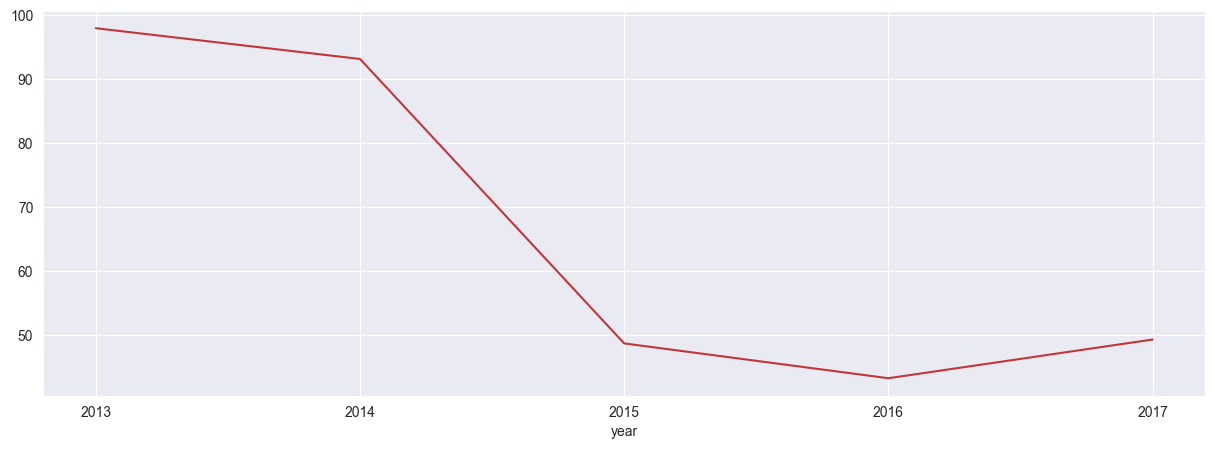

In [100]:
oil.groupby("year")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(2013, 2018, 1))

plt.show()

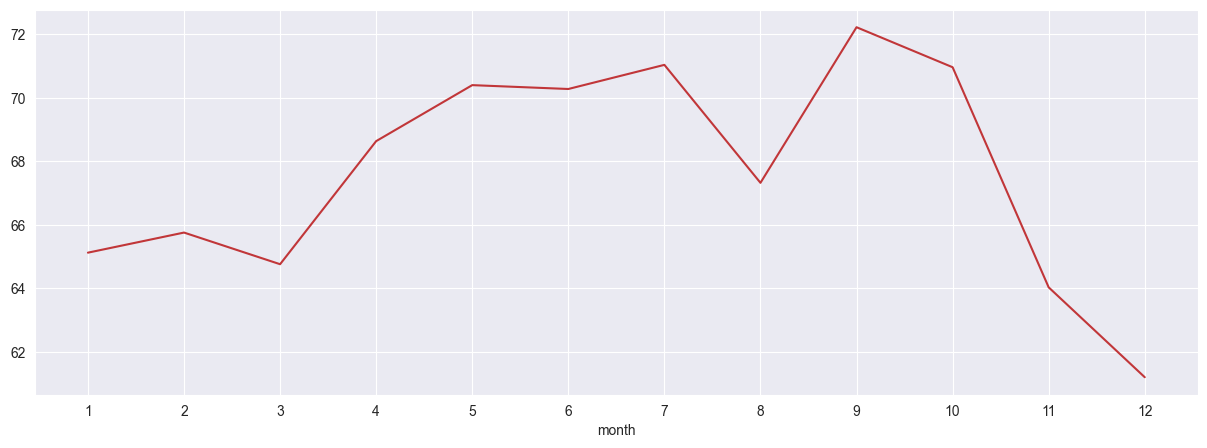

In [101]:
oil.groupby("month")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 13))

plt.show()

### Do analysis on the transactions

In [102]:
transactions["year"] = transactions.index.year
transactions["month"] = transactions.index.month
transactions["day"] = transactions.index.day
transactions["weekday"] = transactions.index.weekday

In [103]:
transactions_viz = transactions.loc[transactions["year"] != 2017]

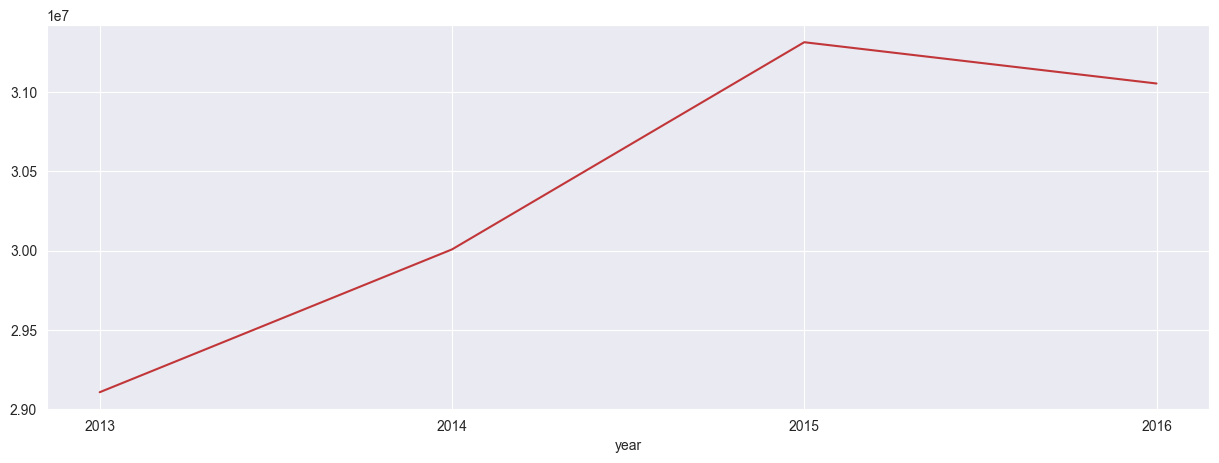

In [104]:
transactions_viz.groupby("year")["transactions"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(2013, 2017, 1))
plt.show()

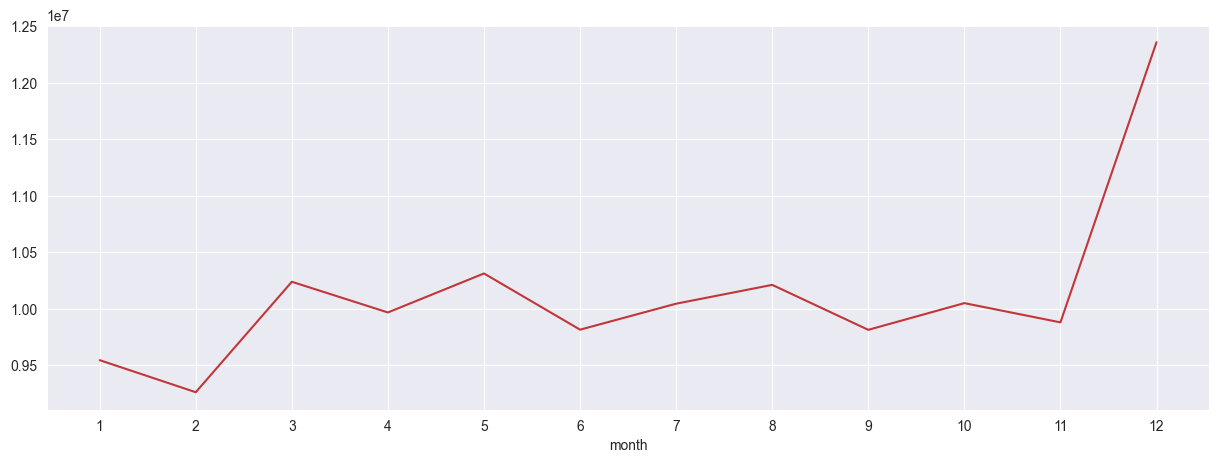

In [105]:
transactions_viz.groupby("month")["transactions"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 13))

plt.show()

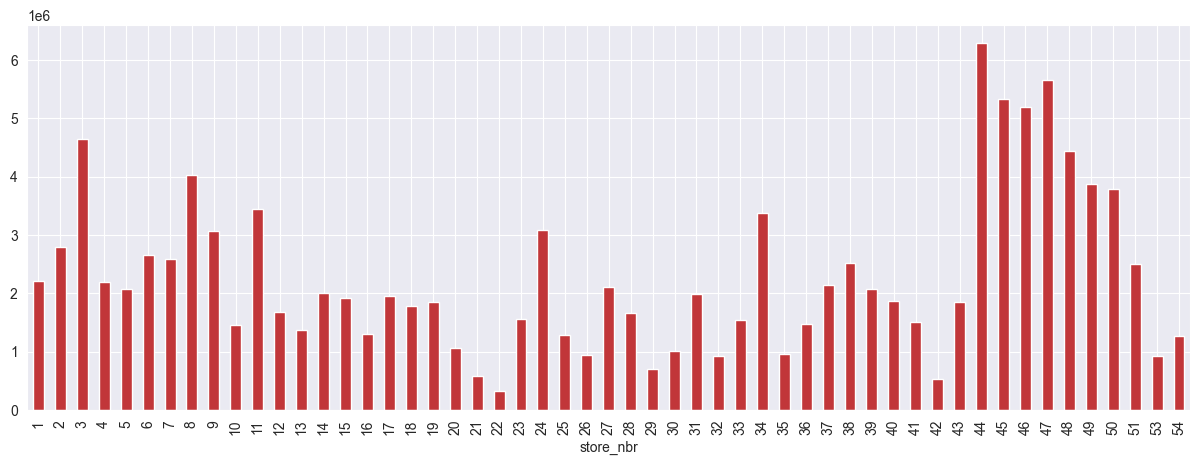

In [106]:
transactions_viz.groupby("store_nbr")["transactions"].sum().plot(kind="bar", figsize=(15, 5))

plt.show()

### Combine Dataset and Feature Engineering

we will have two important dataset. First is transactions and stores

In [107]:
transactions_viz.head()

store_nbr  transactions  year  month  day  weekday
date                                                          
2013-01-01         25           770  2013      1    1        1
2013-01-02          1          2111  2013      1    2        2
2013-01-02          2          2358  2013      1    2        2
2013-01-02          3          3487  2013      1    2        2
2013-01-02          4          1922  2013      1    2        2

In [108]:
transactions_store= transactions_viz.merge(stores, on="store_nbr", how="left")

In [109]:
transactions_store.set_index(transactions_viz.index, inplace=True)

In [110]:
sales_store = train_viz.groupby(["date","store_nbr" ])["sales", "onpromotion"].sum().reset_index()

In [111]:
sales_store.head()

date  store_nbr  sales  onpromotion
0 2013-01-01          1    0.0            0
1 2013-01-01          2    0.0            0
2 2013-01-01          3    0.0            0
3 2013-01-01          4    0.0            0
4 2013-01-01          5    0.0            0

In [112]:
transaction_full= transactions_store.merge(sales_store, left_on=["date", "store_nbr"], right_on=["date", "store_nbr"], how="left")

In [113]:
transaction_full.set_index("date", inplace=True)

In [114]:
#aov(average order values)
#aov  = sales/transactions

In [115]:
transaction_full["aov"] = transaction_full["sales"] / transaction_full["transactions"]

<AxesSubplot: xlabel='store_nbr'>

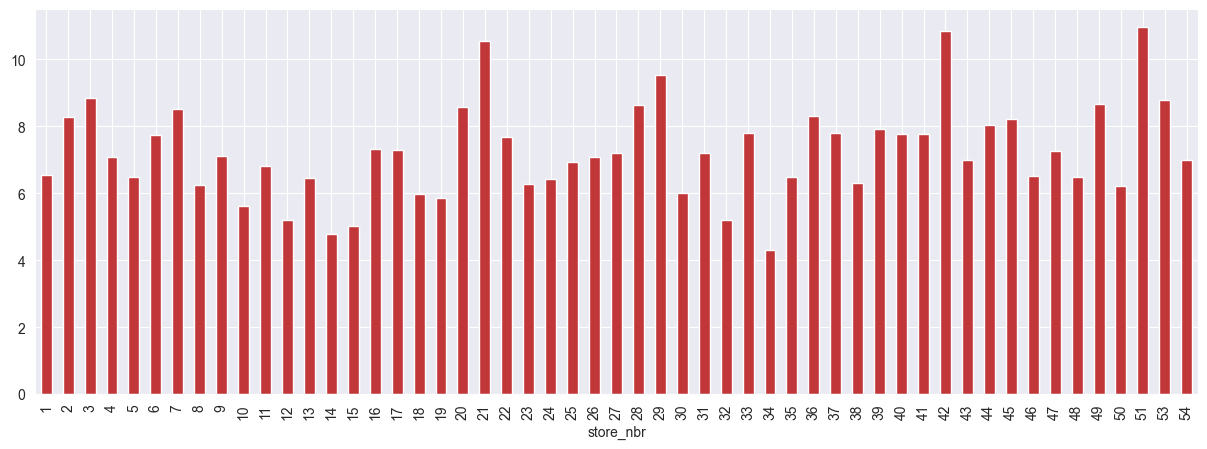

In [116]:
transaction_full.groupby("store_nbr")["aov"].mean().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='month'>

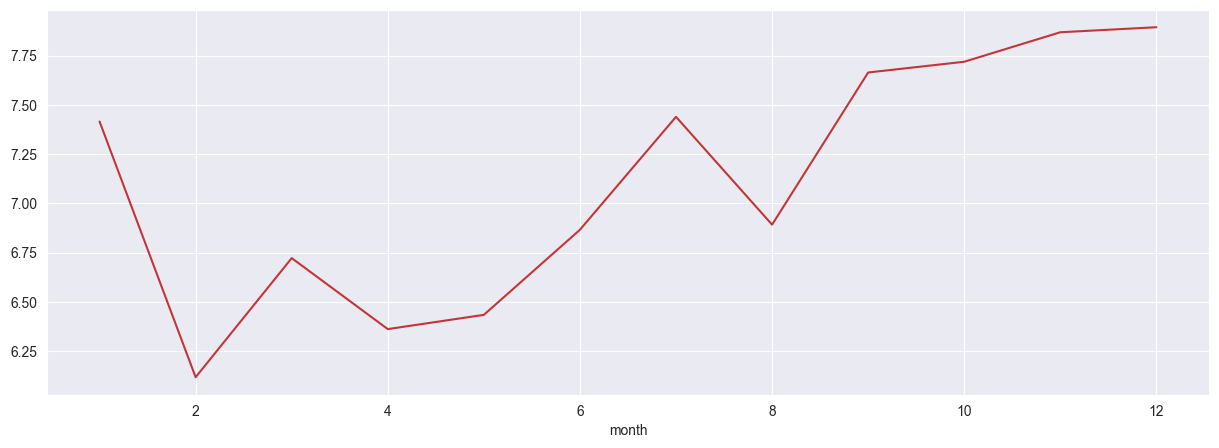

In [117]:
transaction_full.groupby("month")["aov"].mean().plot(kind="line", figsize=(15, 5))

<AxesSubplot: xlabel='month'>

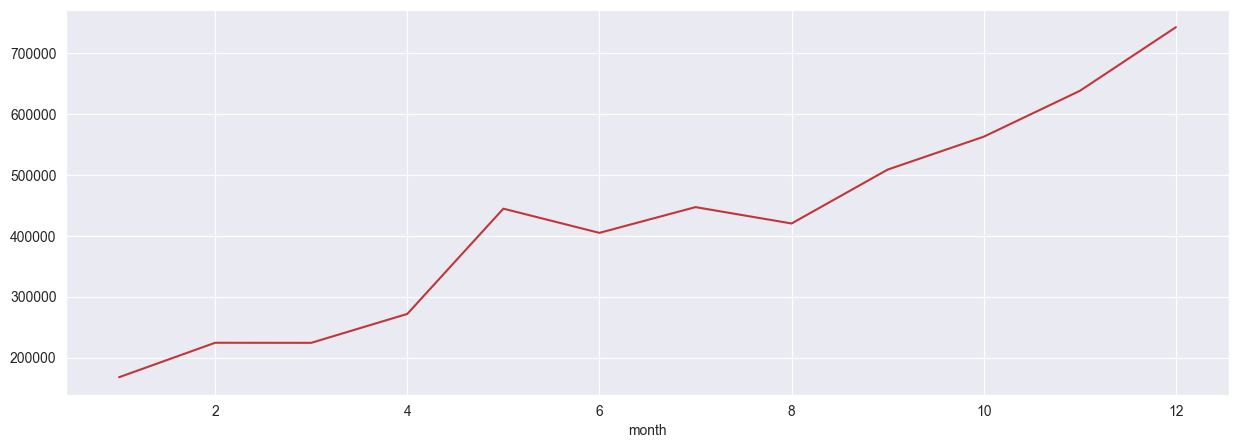

In [118]:
transaction_full.groupby("month")["onpromotion"].sum().plot(kind="line", figsize=(15, 5))

<AxesSubplot: xlabel='day'>

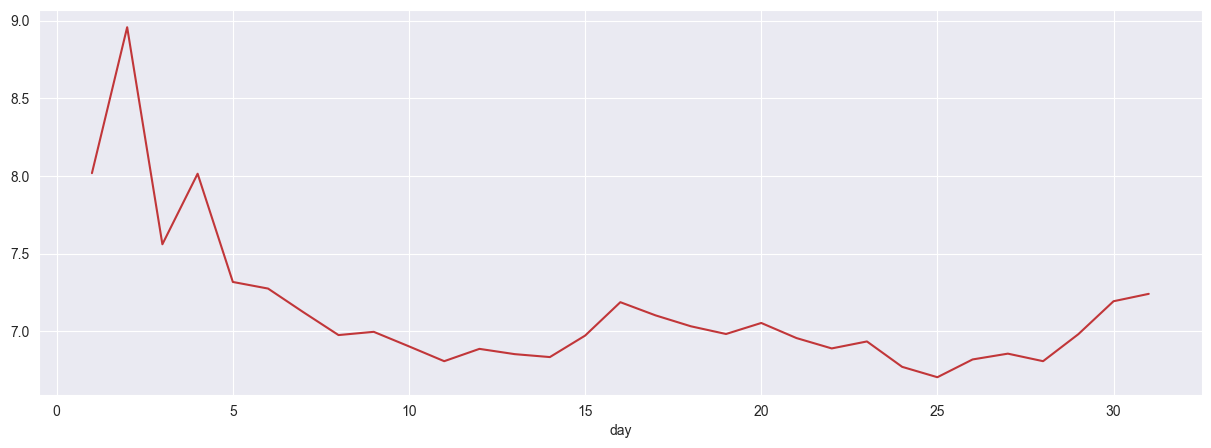

In [119]:
transaction_full.groupby("day")["aov"].mean().plot(kind="line", figsize=(15, 5))

<AxesSubplot: xlabel='year'>

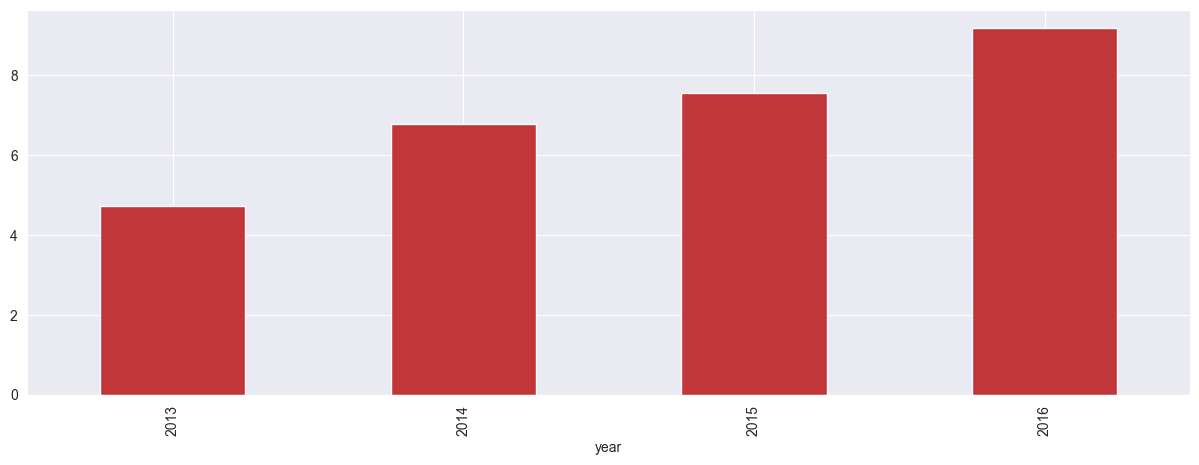

In [120]:
transaction_full.groupby("year")["aov"].mean().plot(kind="bar", figsize=(15, 5))

In [121]:
# promotional_sales_ratio (psr)= promotional_sales(onpromotion) / total_sales

transaction_full["psr"] = transaction_full["onpromotion"] / transaction_full["sales"]

<AxesSubplot: xlabel='store_nbr'>

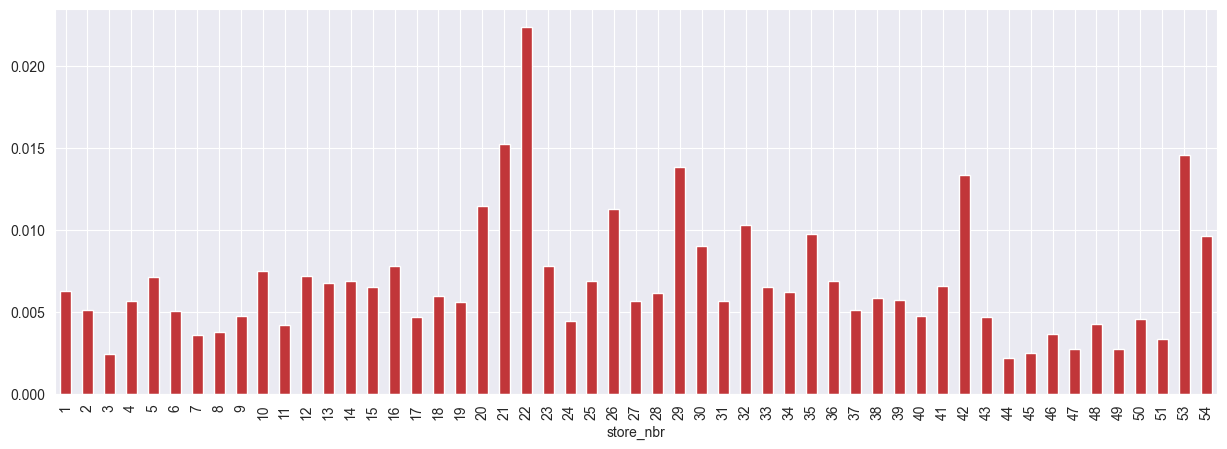

In [122]:
transaction_full.groupby("store_nbr")["psr"].mean().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='month'>

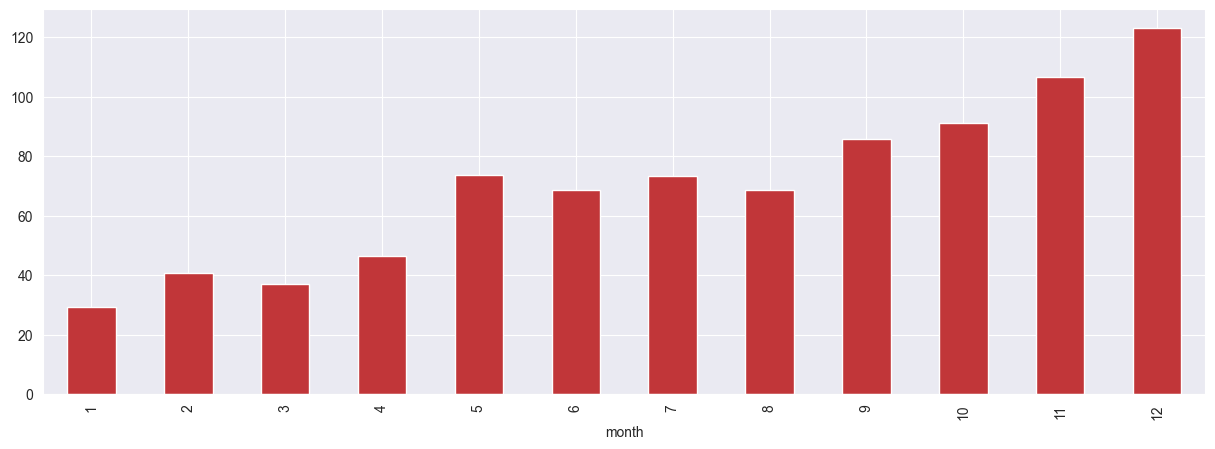

In [123]:
transaction_full.groupby("month")["onpromotion"].mean().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='store_nbr'>

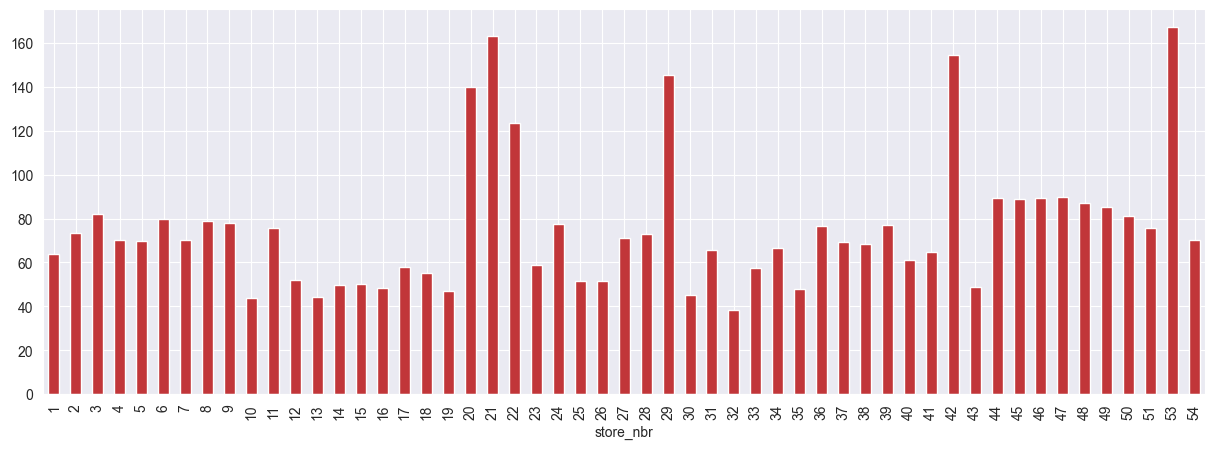

In [124]:
transaction_full.groupby("store_nbr")["onpromotion"].mean().plot(kind="bar", figsize=(15, 5))

##### add holidays data

In [125]:
local_holidays = holidays_filtered[holidays_filtered["locale"] == "Local"]
regional_holidays = holidays_filtered[holidays_filtered["locale"] == "Regional"]
national_holidays = holidays_filtered[holidays_filtered["locale"] == "National"]

In [126]:
def is_holiday_local(row):
    dummy = local_holidays[['year', 'month', 'day', 'locale_name']]
    if row[['year', 'month', 'day', 'city']].isin(dummy).all():
        return 1
    else:
        return 0

In [127]:
def is_holiday_regional(row):
    dummy = regional_holidays[['year', 'month', 'day', 'locale_name']]
    if row[['year', 'month', 'day', 'state']].isin(dummy).all():
        return 1
    else:
        return 0

In [128]:
transaction_full["local_holiday"] = transaction_full.apply(is_holiday_local, axis=1)
transaction_full["regional_holiday"] = transaction_full.apply(is_holiday_regional, axis=1)

In [129]:
transaction_full["national_holiday"] = transaction_full.index.isin(national_holidays.index)

In [130]:
transaction_full["total_holiday"] = transaction_full["local_holiday"] + transaction_full["regional_holiday"] + transaction_full["national_holiday"]

In [131]:
transaction_full["total_holiday"].value_counts()

0    65686
1     5705
Name: total_holiday, dtype: int64

this mean after we processsed holidays data before. we dont get duplicated holidays

In [132]:
transaction_full.head()

store_nbr  transactions  year  month  day  weekday     city  \
date                                                                      
2013-01-01         25           770  2013      1    1        1  Salinas   
2013-01-02          1          2111  2013      1    2        2    Quito   
2013-01-02          2          2358  2013      1    2        2    Quito   
2013-01-02          3          3487  2013      1    2        2    Quito   
2013-01-02          4          1922  2013      1    2        2    Quito   

                  state type  cluster         sales  onpromotion       aov  \
date                                                                         
2013-01-01  Santa Elena    D        1   2511.618999            0  3.261843   
2013-01-02    Pichincha    D       13   7417.148000            0  3.513571   
2013-01-02    Pichincha    D       13  10266.718981            0  4.353994   
2013-01-02    Pichincha    D        8  24060.348000            0  6.900014   
2013-01-02    Pichincha    D        9  10200.083980            0  5.307016   

            psr  local_holiday  regional_holiday  national_holiday  \
date                                                                 
2013-01-01  0.0              0                 0              True   
2013-01-02  0.0              0                 0             False   
2013-01-02  0.0              0                 0             False   
2013-01-02  0.0              0                 0             False   
2013-01-02  0.0              0                 0             False   

            total_holiday  
date                       
2013-01-01              1  
2013-01-02              0  
2013-01-02              0  
2013-01-02              0  
2013-01-02              0

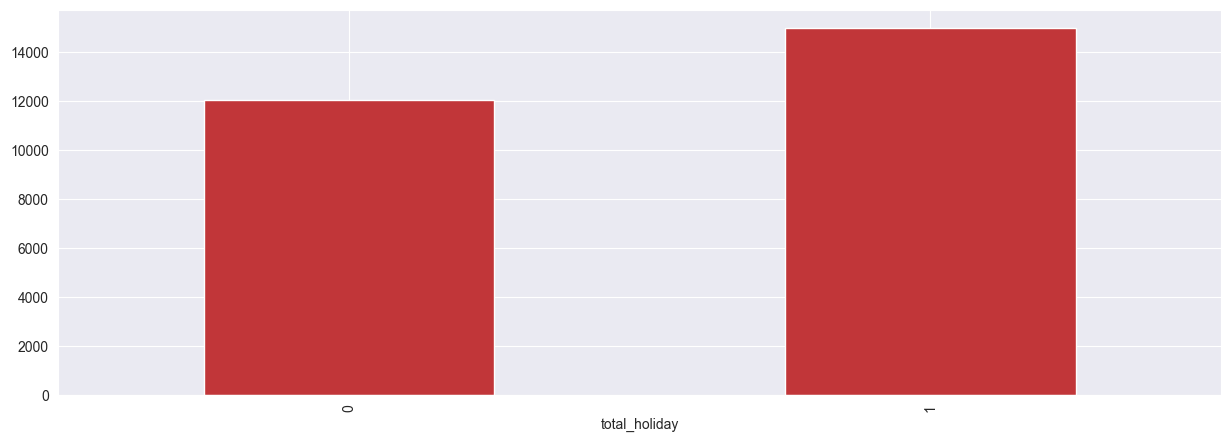

In [133]:
transaction_full.groupby("total_holiday")["sales"].mean().plot(kind="bar", figsize=(15, 5))

plt.show()

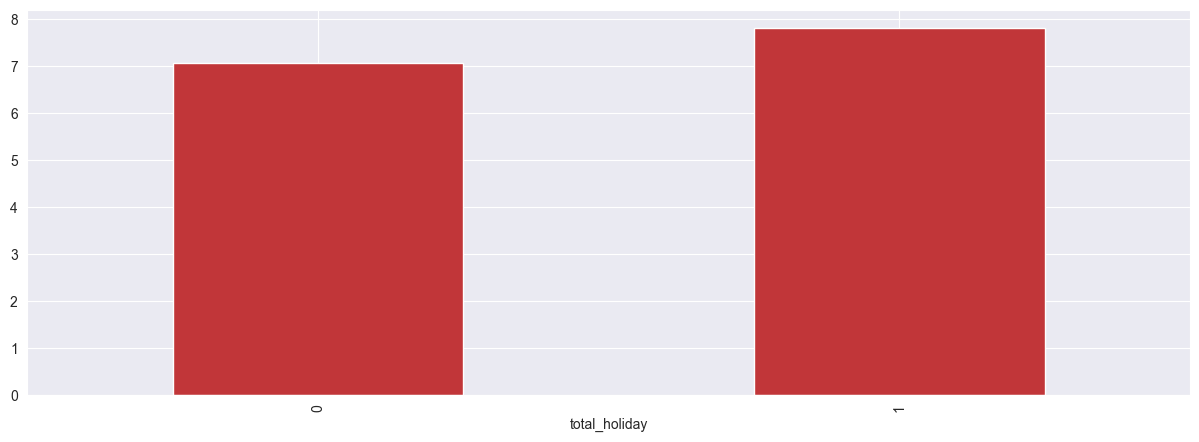

In [134]:
transaction_full.groupby("total_holiday")["aov"].mean().plot(kind="bar", figsize=(15, 5))

plt.show()

In [135]:
test = transaction_full.groupby(["year", "month"])["aov"].mean().reset_index()

<AxesSubplot: xlabel='month', ylabel='aov'>

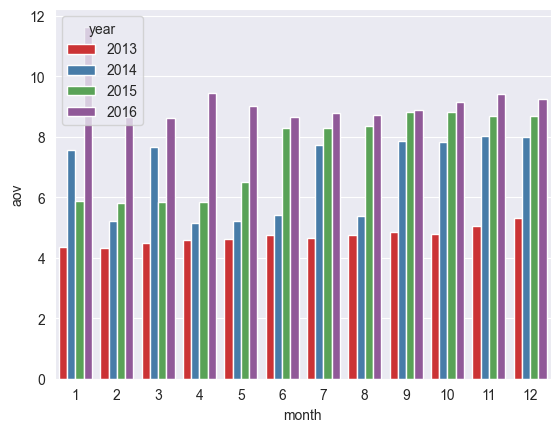

In [136]:
sns.barplot(x="month", y="aov", hue="year", data=test, palette="Set1", legend=True)

### Add oil price

In [137]:
oil.head()

dcoilwtico  year  month  day  weekday
date                                             
2013-01-01       93.14  2013      1    1        1
2013-01-02       93.14  2013      1    2        2
2013-01-03       92.97  2013      1    3        3
2013-01-04       93.12  2013      1    4        4
2013-01-07       93.20  2013      1    7        0

In [138]:
transaction_full = transaction_full.merge(oil[["dcoilwtico"]], left_index=True, right_index=True, how="left")

### Summary of EDA

#### Based on explatory data we will do some important graph to get insight from the data

Note :
* Transaction is the number of transaction in each store
* Sales is the total sales in each store especially is some category family in train dataset

### Analysis by Year

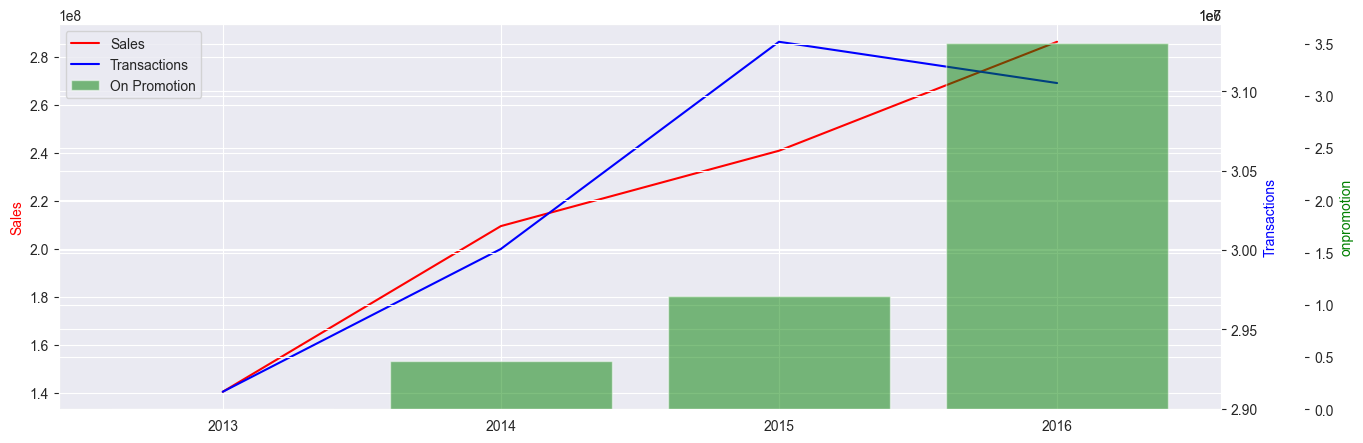

In [139]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

ax1.plot(transaction_full.groupby("year")["sales"].sum(), color="red", label="Sales")
ax2.plot(transaction_full.groupby("year")["transactions"].sum(), color="blue", label="Transactions")

ax1.set_ylabel('Sales', color="red")
ax2.set_ylabel('Transactions', color="blue")

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))

ax3.bar(transaction_full.groupby("year")["onpromotion"].sum().index, transaction_full.groupby("year")["onpromotion"].sum(), color="green", alpha=0.5, label="On Promotion")
ax3.set_ylabel('onpromotion', color="green")

plt.xticks(np.arange(2013, 2017, 1))

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines + lines2 + lines3, labels + labels2 + labels3)

plt.xlabel("Year")

plt.show()


key points:

1. Number of transaction and sales is increasing every year except number of transaction in 2016 is decreasing 
2. Even though number of transaction is decreasing in 2016, sales is increasing. This can be due to number of onpromotion is highly increasing in 2016 around 226% from 2015
3. This sales also can be affected by oil price, which every year oil price is decreasing that can affect the customer purchasing power

In [140]:
### Table percentage of change in on promotion each year

promotion = transaction_full.groupby("year")["onpromotion"].sum().reset_index().sort_values("year")
promotion["percentage_change"] = promotion["onpromotion"].pct_change()*100

In [141]:
promotion

year  onpromotion  percentage_change
0  2013            0                NaN
1  2014       459114                inf
2  2015      1087275         136.820267
3  2016      3509267         222.757996

(2013.0, 2016.0)

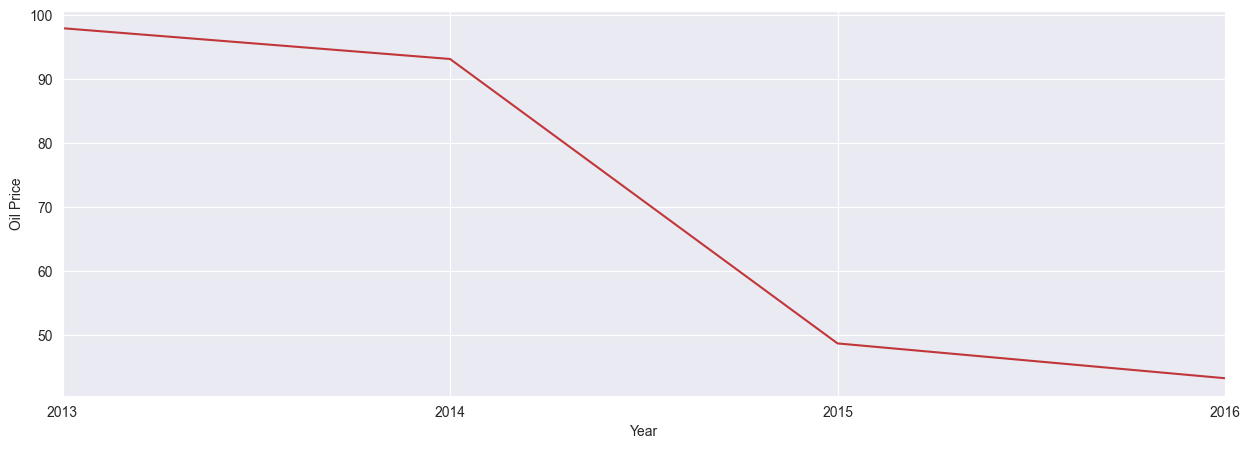

In [142]:
oil.groupby("year")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(2013, 2017, 1))

plt.xlabel("Year")
plt.ylabel("Oil Price")

plt.xlim(2013, 2016)

#### holidays

In [143]:
holidays_filtered["national_holiday"] = holidays_filtered["locale"].apply(lambda x: 1 if x == "National" else 0)

Text(0, 0.5, 'Number of National Holiday')

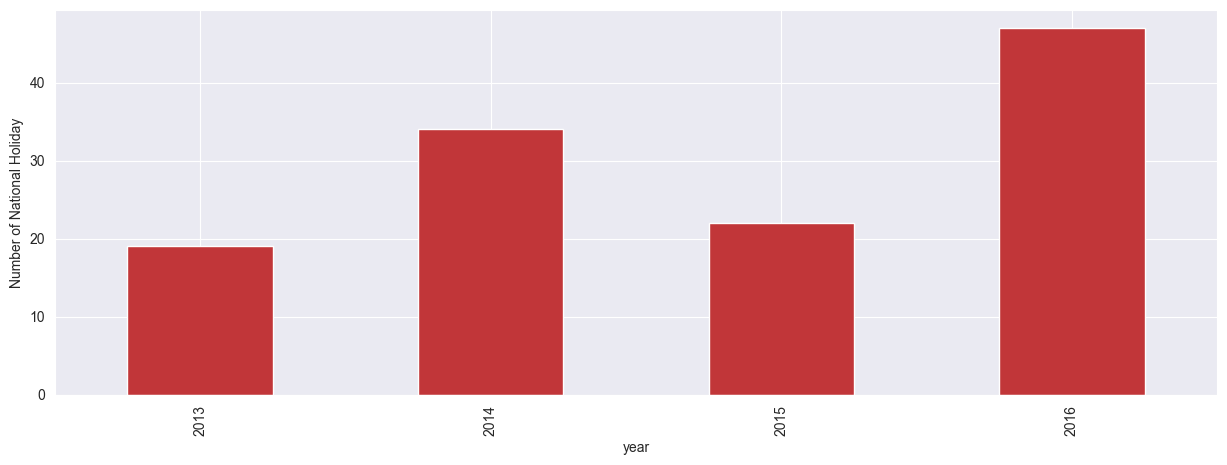

In [144]:
holidays_filtered.groupby("year")["national_holiday"].sum().plot(kind="bar", figsize=(15, 5))

plt.ylabel("Number of National Holiday")

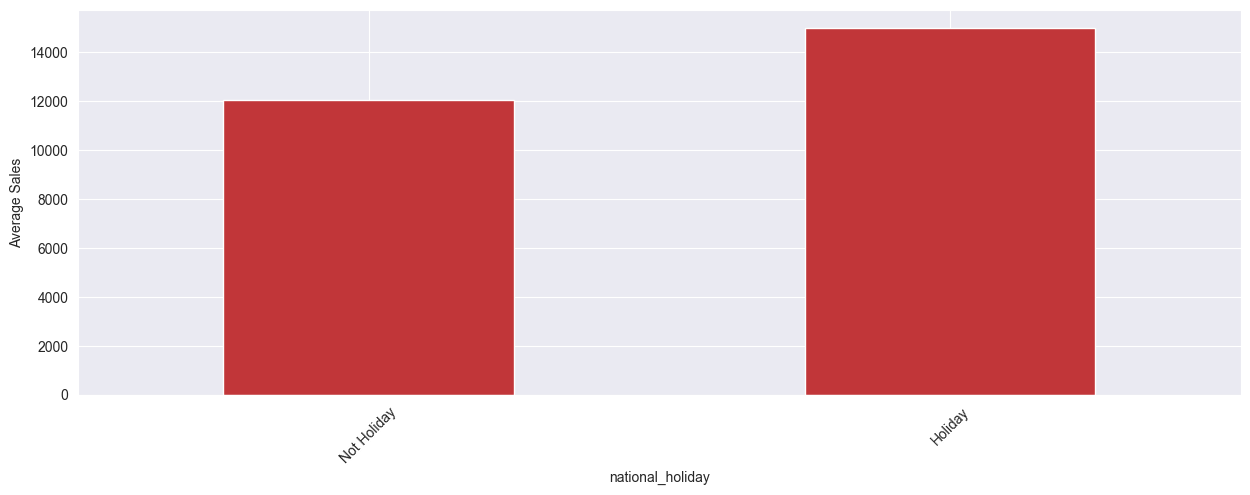

In [145]:
transaction_full.groupby("national_holiday")["sales"].mean().plot(kind="bar", figsize=(15, 5))

plt.xticks(np.arange(0, 2), ["Not Holiday", "Holiday"], rotation=45)
plt.ylabel("Average Sales")

plt.show()

key points :

1. Number of holidays in 214 is increasing because of the World Cup 2014 in Brazil. Then in 2016 because of equador earthquake.
2. Average sales in holidays is higher than not holidays
3. if we see in 2015 number of holidays is decreasing but the average sales is increasing. Maybe because of the number of promotion is increasing 136%

#### Analysis by Month

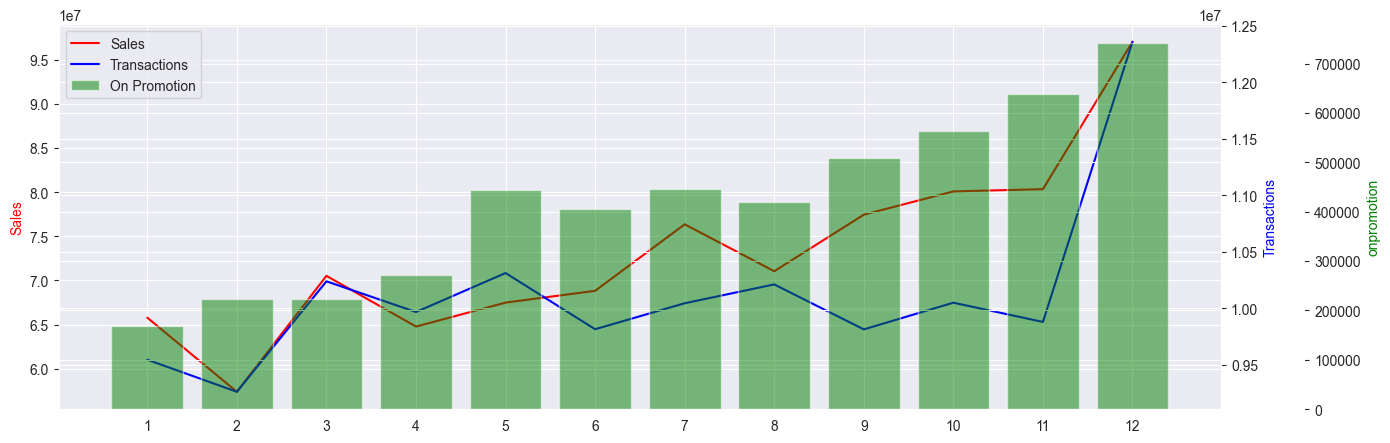

In [146]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

ax1.plot(transaction_full.groupby("month")["sales"].sum(), color="red", label="Sales")
ax2.plot(transaction_full.groupby("month")["transactions"].sum(), color="blue", label="Transactions")

ax1.set_ylabel('Sales', color="red")
ax2.set_ylabel('Transactions', color="blue")

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))

ax3.bar(transaction_full.groupby("month")["onpromotion"].sum().index, transaction_full.groupby("month")["onpromotion"].sum(), color="green", alpha=0.5, label="On Promotion")
ax3.set_ylabel('onpromotion', color="green")

plt.xticks(np.arange(1,13, 1))

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines + lines2 + lines3, labels + labels2 + labels3)

plt.xlabel("month")

plt.show()


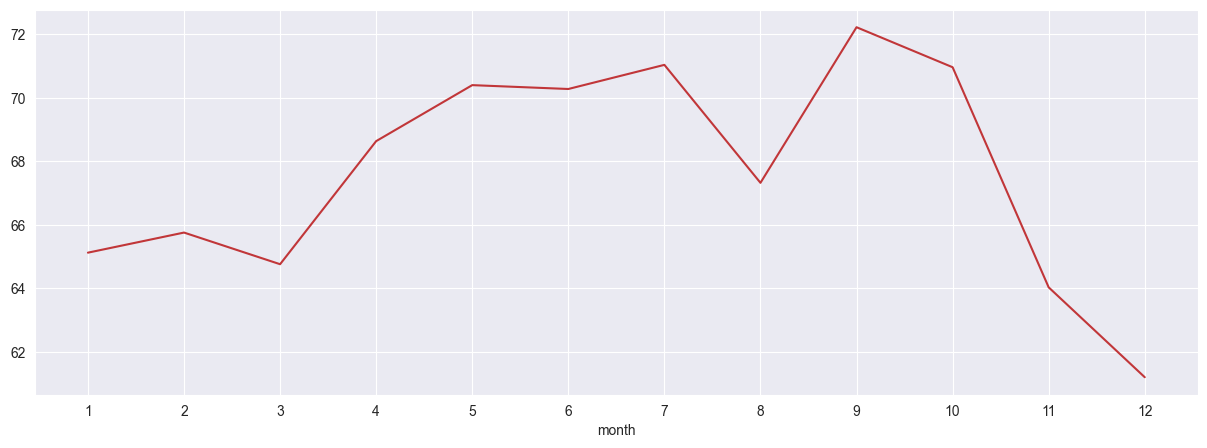

In [147]:
oil.groupby("month")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 13))

plt.show()

In [148]:
month = transaction_full.groupby(["year", "month"])["sales"].sum().reset_index()

<AxesSubplot: xlabel='month', ylabel='sales'>

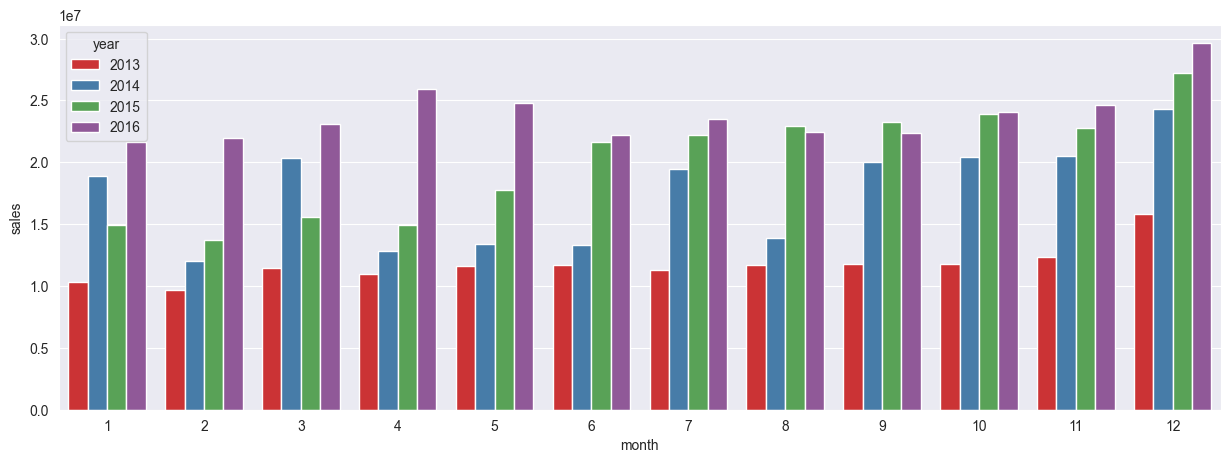

In [149]:
plt.figure(figsize=(15, 5))

sns.barplot(x="month", y="sales", hue="year", data=month, palette="Set1", legend=True)

In [150]:
month_promo = transaction_full.groupby(["month", "year"])["onpromotion"].sum().reset_index()


<AxesSubplot: xlabel='month', ylabel='onpromotion'>

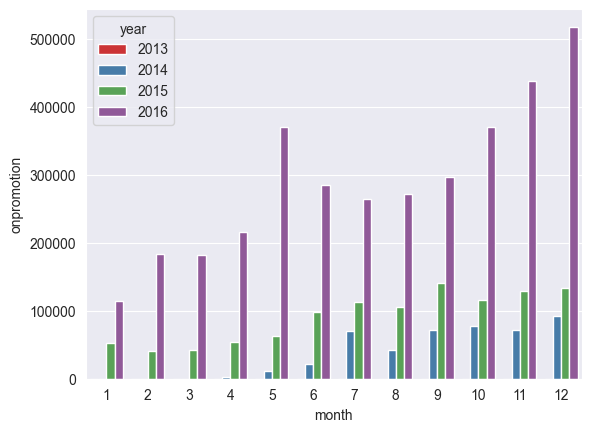

In [151]:
sns.barplot(x="month", y="onpromotion", hue="year", data=month_promo, palette="Set1", legend=True)

key points: 

1. The sales activity is increasing juny and july 2016. This is the time when earthquake happened in Ecuador (16 April 2016) and those days were holidays around one month. Number of promotion also increased in that month

2. The point is also in july 2014 the sales and oromotion slightly increased. This is the time when world cup 2014 happened in Brazil. Ecuador is one of the country that participated in the world cup. 

In [152]:
month_holidays = holidays_filtered.groupby(["year", "month"])["national_holiday"].sum().reset_index()

<AxesSubplot: xlabel='month', ylabel='national_holiday'>

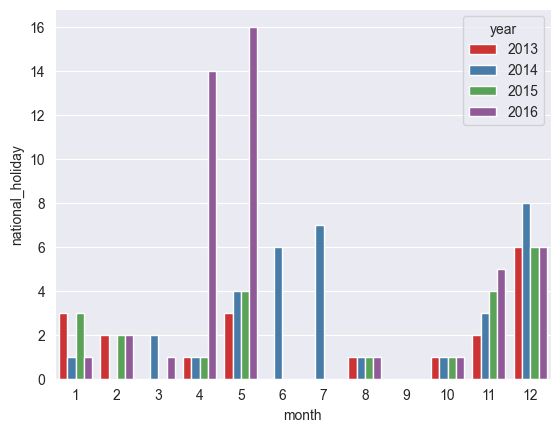

In [260]:
sns.barplot(x="month", y="national_holiday", hue="year", data=month_holidays, palette="Set1", legend=True)

In [153]:
transaction_full["agg_national_holiday"] = transaction_full.groupby(["year", "month", "day"])["national_holiday"].transform("sum")

In [154]:
correlation_data = transaction_full[["sales", "transactions", "onpromotion", "dcoilwtico", "year", "month", "day"]].merge(month_holidays, left_on=["year", "month"], right_on=["year", "month"], how="left")


In [155]:
correlation_data[["sales", "transactions", "onpromotion", "dcoilwtico", "national_holiday"]].corr()

sales  transactions  onpromotion  dcoilwtico  \
sales             1.000000      0.835647     0.289081   -0.262766   
transactions      0.835647      1.000000     0.088241    0.018856   
onpromotion       0.289081      0.088241     1.000000   -0.512223   
dcoilwtico       -0.262766      0.018856    -0.512223    1.000000   
national_holiday  0.109916      0.036697     0.226653   -0.136170   

                  national_holiday  
sales                     0.109916  
transactions              0.036697  
onpromotion               0.226653  
dcoilwtico               -0.136170  
national_holiday          1.000000

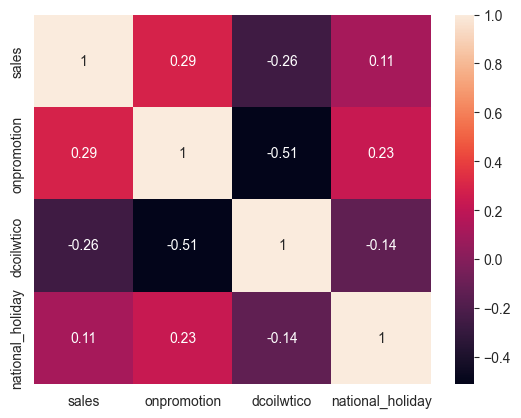

In [156]:
#### Corerlation Sales and On Promotion

sns.heatmap(correlation_data[["sales", "onpromotion", "dcoilwtico", "national_holiday"]].corr(), annot=True)


plt.show()


key points :

1. If we see Sales and promotion as correlation and we can see from pearson correlation, it means that promotion is the key to increase sales

2. Then oil price has high correlation with promotion, it mean it hopes with oil price decrease can increase customer to buy more product then with promotion can increase more sales

3. we can see aslo promotion has correaltion with holiday. it hopes in holidays customer can buy more product with additional promotion. However it is not as efective as oil price


### Do Analysis by day

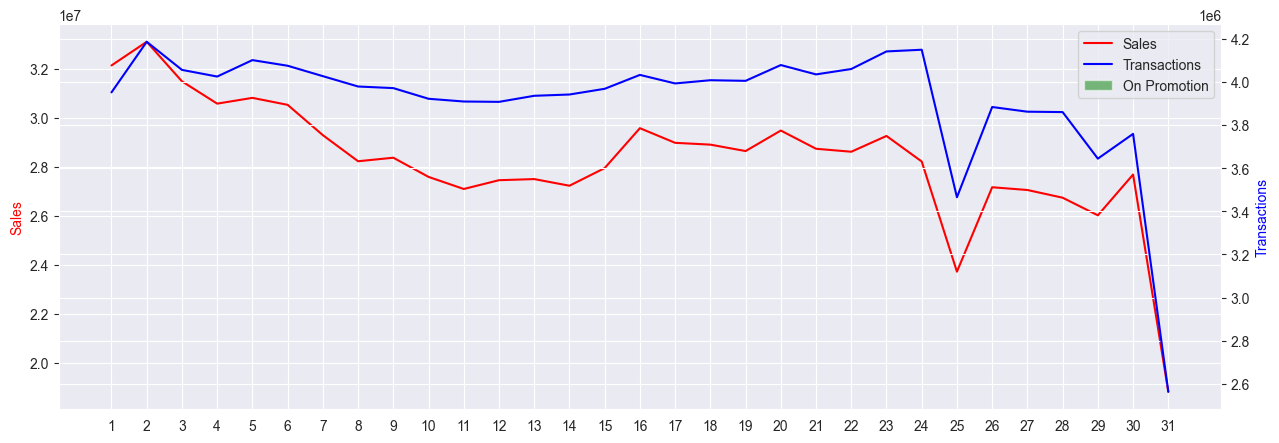

In [157]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

ax1.plot(transaction_full.groupby("day")["sales"].sum(), color="red", label="Sales")
ax2.plot(transaction_full.groupby("day")["transactions"].sum(), color="blue", label="Transactions")

ax1.set_ylabel('Sales', color="red")
ax2.set_ylabel('Transactions', color="blue")

plt.xticks(np.arange(1,32, 1))

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines + lines2 + lines3, labels + labels2 + labels3)

plt.xlabel("day")

plt.show()


we have low value in day 25 because we have missing days for 25 december

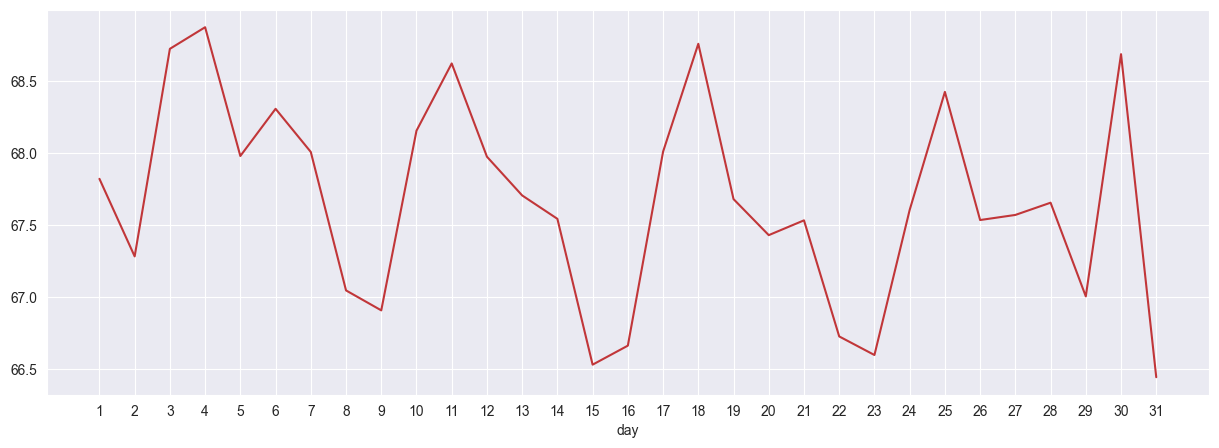

In [158]:
oil.groupby("day")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 32))

plt.show()

In [159]:
train_viz.query("day == 26").tail()

id  store_nbr                      family        sales  \
date                                                                      
2016-12-26  2587459          9                     POULTRY   704.269960   
2016-12-26  2587460          9              PREPARED FOODS   105.548996   
2016-12-26  2587461          9                     PRODUCE  2030.049000   
2016-12-26  2587462          9  SCHOOL AND OFFICE SUPPLIES     0.000000   
2016-12-26  2587463          9                     SEAFOOD    12.000000   

            onpromotion  year  month weekday  day  quarter  
date                                                        
2016-12-26            0  2016     12  Monday   26        4  
2016-12-26            2  2016     12  Monday   26        4  
2016-12-26            3  2016     12  Monday   26        4  
2016-12-26            0  2016     12  Monday   26        4  
2016-12-26            0  2016     12  Monday   26        4

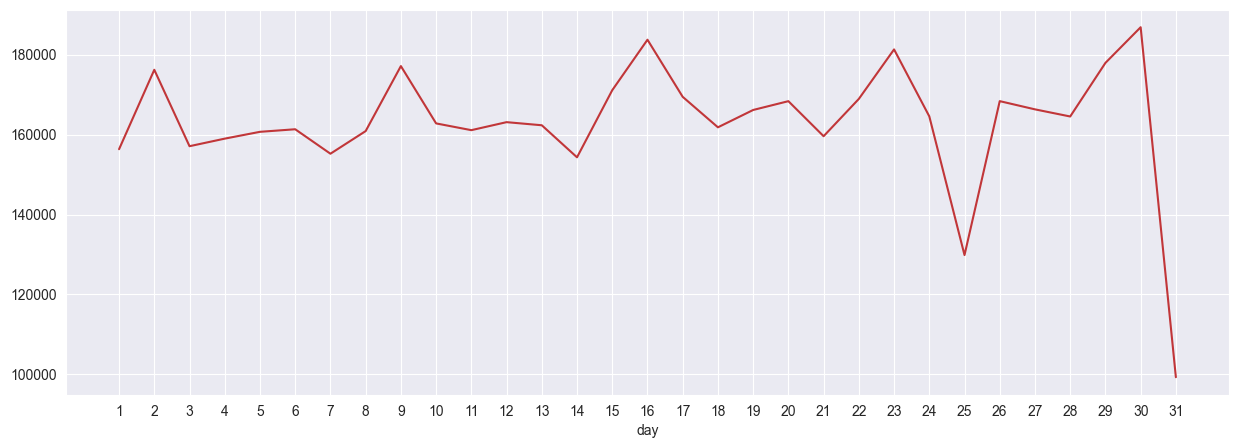

In [160]:
transaction_full.groupby("day")["onpromotion"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 32))

plt.show()

key points:

As we can see sales and transactions are start to slightly increase when start the month and deacrease the slighly increase again when enter the middle of month because some wages are paid in the middle of month and end of month

### Do analysis by weekday

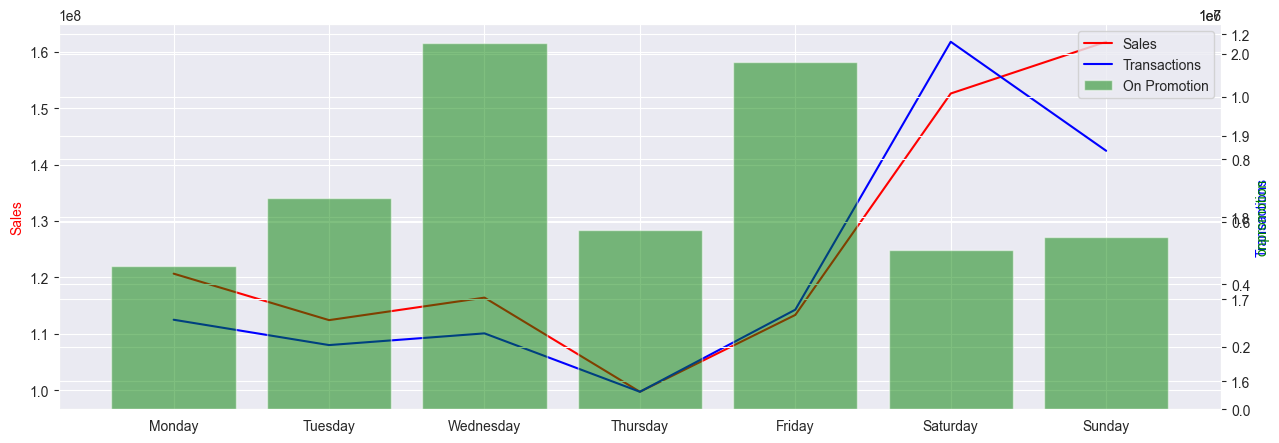

In [161]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

ax1.plot(transaction_full.groupby("weekday")["sales"].sum(), color="red", label="Sales")
ax2.plot(transaction_full.groupby("weekday")["transactions"].sum(), color="blue", label="Transactions")

ax1.set_ylabel('Sales', color="red")
ax2.set_ylabel('Transactions', color="blue")

ax3 = ax1.twinx()
ax3.bar(transaction_full.groupby("weekday")["onpromotion"].sum().index, transaction_full.groupby("weekday")["onpromotion"].sum(), color="green", alpha=0.5, label="On Promotion")
ax3.set_ylabel('onpromotion', color="green")

plt.xticks(np.arange(0,7, 1), weekday_order)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines + lines2 + lines3, labels + labels2 + labels3)

plt.xlabel("weekday")

plt.show()


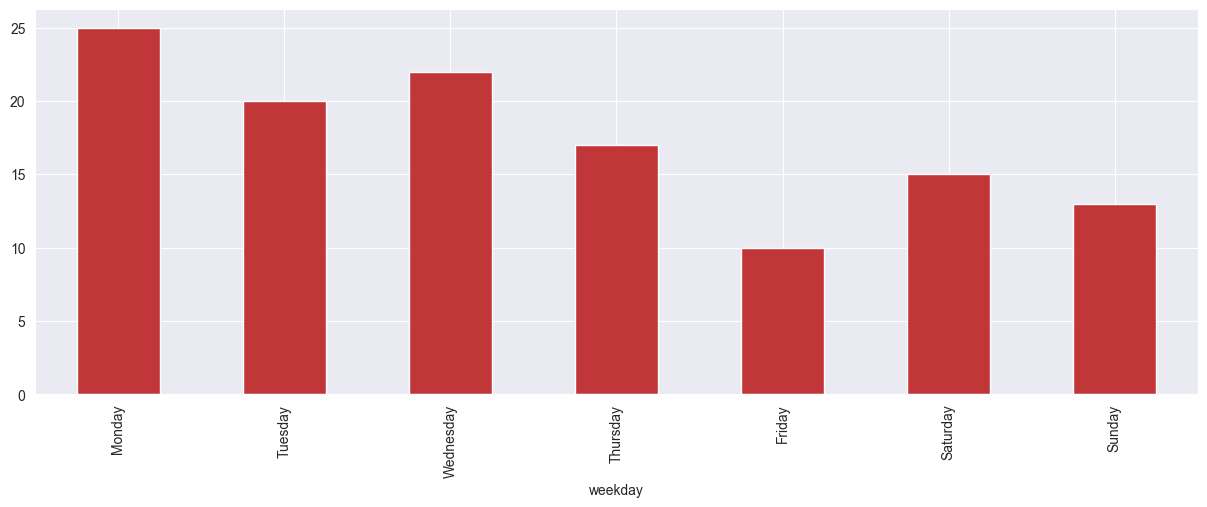

In [162]:
holidays_filtered.groupby("weekday")["national_holiday"].sum().plot(kind="bar", figsize=(15, 5))

plt.xticks(np.arange(0,7, 1), weekday_order)

plt.show()

key points :

1. we dont have information about trade oil on weekend because the oil market is closed on weekend.
so that is why we have missing days on weekend for oil data. So It means we can fill the data for the weekend based on previous value

2. we can see for weekdays is rely on the promotion but number of transaction and sales is increase when enter weekend

### Do Analysis by Store

In [164]:
transaction_full.head()

store_nbr  transactions  year  month  day  weekday     city  \
date                                                                      
2013-01-01         25           770  2013      1    1        1  Salinas   
2013-01-02          1          2111  2013      1    2        2    Quito   
2013-01-02          2          2358  2013      1    2        2    Quito   
2013-01-02          3          3487  2013      1    2        2    Quito   
2013-01-02          4          1922  2013      1    2        2    Quito   

                  state type  cluster         sales  onpromotion       aov  \
date                                                                         
2013-01-01  Santa Elena    D        1   2511.618999            0  3.261843   
2013-01-02    Pichincha    D       13   7417.148000            0  3.513571   
2013-01-02    Pichincha    D       13  10266.718981            0  4.353994   
2013-01-02    Pichincha    D        8  24060.348000            0  6.900014   
2013-01-02    Pichincha    D        9  10200.083980            0  5.307016   

            psr  local_holiday  regional_holiday  national_holiday  \
date                                                                 
2013-01-01  0.0              0                 0              True   
2013-01-02  0.0              0                 0             False   
2013-01-02  0.0              0                 0             False   
2013-01-02  0.0              0                 0             False   
2013-01-02  0.0              0                 0             False   

            total_holiday  dcoilwtico  agg_national_holiday  
date                                                         
2013-01-01              1       93.14                     1  
2013-01-02              0       93.14                     0  
2013-01-02              0       93.14                     0  
2013-01-02              0       93.14                     0  
2013-01-02              0       93.14                     0

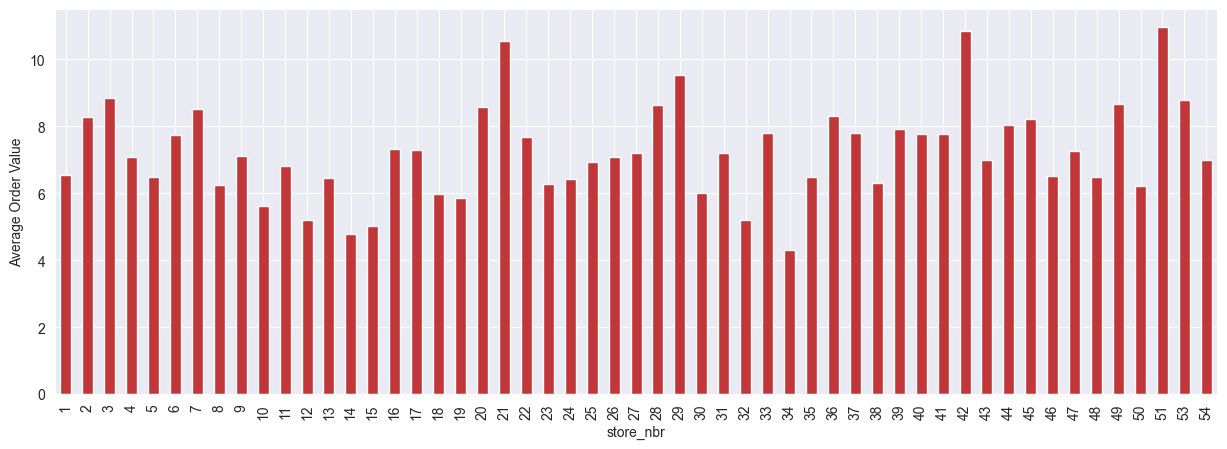

In [165]:
transaction_full.groupby("store_nbr")["aov"].mean().plot(kind="bar", figsize=(15, 5))

plt.ylabel("Average Order Value")

plt.show()


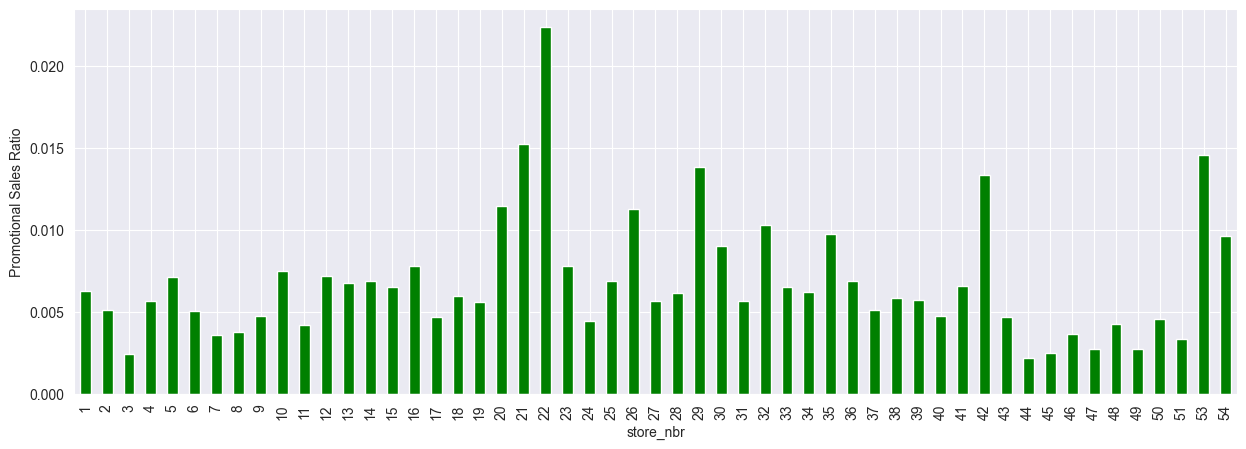

In [166]:
transaction_full.groupby("store_nbr")["psr"].mean().plot(kind="bar",color = "green", figsize=(15, 5))

plt.ylabel("Promotional Sales Ratio")
plt.show()

In [167]:
store_51 = train_viz[train_viz["store_nbr"] == 51]

In [168]:
store_51.groupby("family")["sales"].sum().sort_values(ascending=False).head()

family
GROCERY I    7.064510e+06
BEVERAGES    5.757994e+06
PRODUCE      4.377145e+06
CLEANING     2.105991e+06
DAIRY        2.085641e+06
Name: sales, dtype: float64

In [169]:
store_51.groupby("family")["onpromotion"].sum().sort_values(ascending=False).head()

family
GROCERY I    26957
PRODUCE      20968
BEVERAGES    14588
DELI          7834
CLEANING      7812
Name: onpromotion, dtype: int64

In [170]:
store_22 = train_viz[train_viz["store_nbr"] == 22]

In [171]:
store_22.groupby("family")["sales"].sum().sort_values(ascending=False).head(5)

family
GROCERY I    1.001842e+06
BEVERAGES    5.193260e+05
CLEANING     2.645490e+05
PRODUCE      1.642989e+05
DAIRY        1.265150e+05
Name: sales, dtype: float64

In [172]:
store_22.groupby("family")["onpromotion"].sum().sort_values(ascending=False).head(5)

family
GROCERY I    15620
DAIRY         6965
BEVERAGES     5772
PRODUCE       5422
CLEANING      4835
Name: onpromotion, dtype: int64

In [173]:
store_22 = train_viz[train_viz["store_nbr"] == 22]

<AxesSubplot: xlabel='type'>

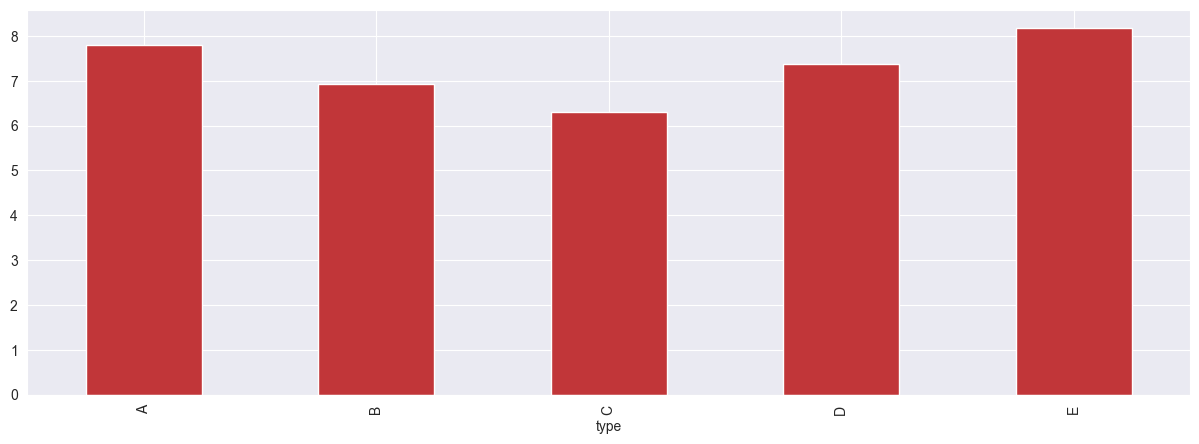

In [174]:
transaction_full.groupby("type")["aov"].mean().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='type'>

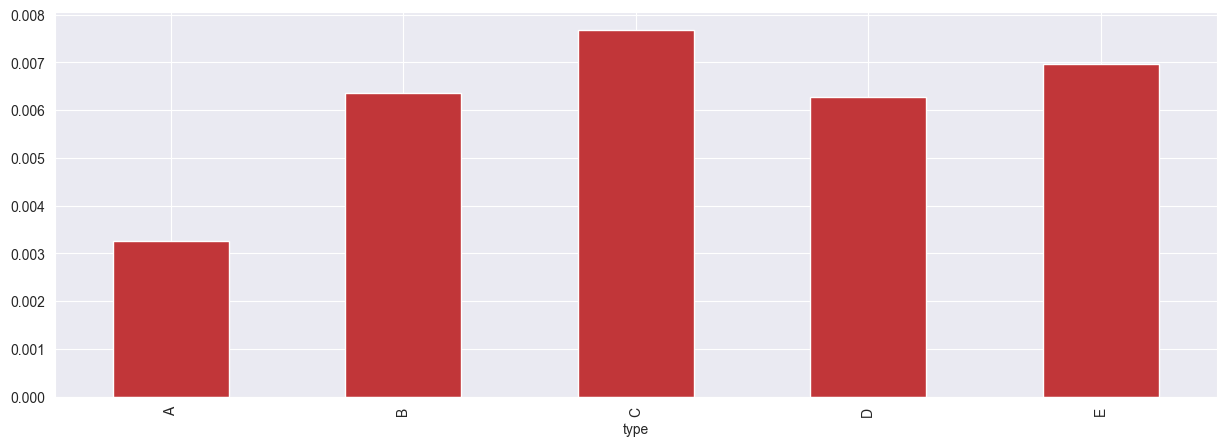

In [175]:
transaction_full.groupby("type")["psr"].mean().plot(kind="bar", figsize=(15, 5))

In [176]:
a = transaction_full.query("type == 'A'")["store_nbr"].unique()
a

array([44, 45, 46, 47, 48, 49, 50, 51])

In [177]:
c = transaction_full.query("type == 'C'")["store_nbr"].unique()
c

array([10, 12, 13, 14, 15, 16, 17, 19, 30, 32, 33, 35, 40, 54, 22])

In [178]:
train_viz.query("store_nbr in @a").groupby("family")["sales"].sum().sort_values(ascending=False).head(5)

family
GROCERY I    8.795437e+07
BEVERAGES    5.735129e+07
PRODUCE      3.531288e+07
CLEANING     2.368491e+07
DAIRY        1.913834e+07
Name: sales, dtype: float64

In [179]:
train_viz.query("store_nbr in @c").groupby("family")["sales"].sum().sort_values(ascending=False).head(5)

family
GROCERY I    5.400560e+07
BEVERAGES    2.579179e+07
CLEANING     1.763282e+07
PRODUCE      6.481227e+06
DAIRY        5.857098e+06
Name: sales, dtype: float64

In [180]:
train_viz["psr"] = train_viz["onpromotion"] / train_viz["sales"]

key points :

in store analysis, we use two parameters to measure the performance of the store, which are average order value and promotional sales ratio.

average order value is the average of sales per transaction. the higher the average order value, the better the performance of the store.
promotion sales ratio is the ratio of sales that come from promotion. the higher the promotion sales ratio means there are some sales that come from promotion. the smaller psr means that can be small number of sales on promotion is small but total sales still high. So the store is effective even without promotion.


1. 
The interesting stores come from store that have high aov but small psr wich comes from some stores in 44-51 (store with "type" A) especially for the store **51**.
vice versa, the store that have low aov but high psr comes from some stores especially **22**

it means store 51 is effective even with small promotion and store 22 is not effective with promotion

2. 
There is also probably sales is higher because the family has different unit size. for example, the family with the highest sales is beverages. it is probably because the unit size of beverages, produce is bigger than other family. so the sales is higher. You can notice from agregation above about sales data by family especially like produce.


** check by the city **

based on the type we can see if the stores is almost from Quito and also one additional store from Quayaquil. These city is the capital of the country and also the biggest city in the Equador or crowded city. So we can assume that the store in the crowded city in equador.

### Do analysis by family

we will work mostly in data train so we need to merge with other data

In [ ]:
train_viz.head()

id  store_nbr      family  sales  onpromotion  year  month  \
date                                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0  2013      1   
2013-01-01   1          1   BABY CARE    0.0            0  2013      1   
2013-01-01   2          1      BEAUTY    0.0            0  2013      1   
2013-01-01   3          1   BEVERAGES    0.0            0  2013      1   
2013-01-01   4          1       BOOKS    0.0            0  2013      1   

            weekday  day  quarter  psr  
date                                    
2013-01-01  Tuesday    1        1  NaN  
2013-01-01  Tuesday    1        1  NaN  
2013-01-01  Tuesday    1        1  NaN  
2013-01-01  Tuesday    1        1  NaN  
2013-01-01  Tuesday    1        1  NaN

In [203]:
train_oil = train_viz.merge(oil[["dcoilwtico"]], left_index=True, right_index=True, how="left")

In [204]:
train_merge = train_oil.merge(holidays_filtered[["national_holiday"]], left_index=True, right_index=True, how="left")

in here I just focus for national holiday to make it simple

#### General

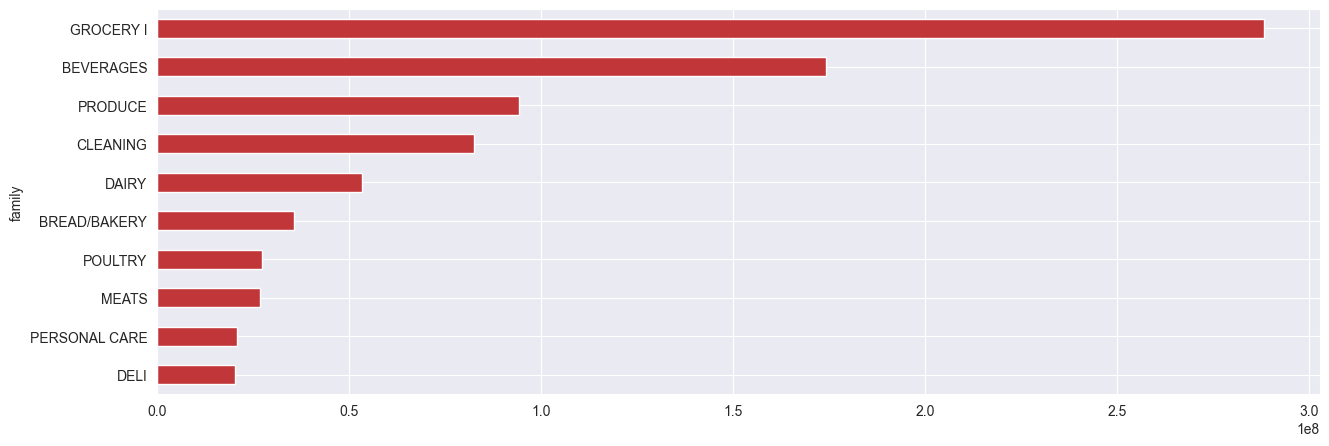

In [224]:
train_merge.groupby("family")["sales"].sum().sort_values(ascending=False).head(10).plot(kind="barh", figsize=(15, 5)).invert_yaxis()

In [225]:
train_family = train.groupby(["family", "year", "month"])["sales"].sum().reset_index()

In [226]:
train_family.sort_values(by = ["family", "year", "month"], inplace = True)

In [227]:
#this is 3 faimily with highest sales 
BestFamily = ["GROCERY I", "BEVERAGES", "PRODUCE"]

In [228]:
train_family_best = train_family[train_family["family"].isin(BestFamily)]

In [235]:
train_family_best["pct_change"] = train_family_best["sales"].pct_change()*100

In [238]:
train_family_best.loc[train_family_best["month"] == 1, "pct_change"] = 0

In [256]:
train_family_best.query("family == 'GROCERY I'").sort_values(by = ["pct_change"], ascending=False).head(5)

family  year  month        sales  pct_change
695  GROCERY I  2014     12  7465455.145   30.800007
719  GROCERY I  2016     12  9454952.927   29.115319
683  GROCERY I  2013     12  6451806.000   28.334847
711  GROCERY I  2016      4  8408542.133   25.171946
707  GROCERY I  2015     12  8354408.355   24.923610

In [257]:
train_family_best.query("family == 'BEVERAGES'").sort_values(by = ["pct_change"], ascending=False).head(5)

family  year  month      sales  pct_change
182  BEVERAGES  2014      3  4430194.0  131.130146
188  BEVERAGES  2014      9  4304900.0  104.098275
186  BEVERAGES  2014      7  4175817.0   98.765326
196  BEVERAGES  2015      5  3534100.0   53.180530
197  BEVERAGES  2015      6  4767226.0   34.892221

In [258]:
train_family_best.query("family == 'PRODUCE'").sort_values(by = ["pct_change"], ascending=False).head(5)

family  year  month         sales    pct_change
1682  PRODUCE  2013      3  4.037000e+03           inf
1694  PRODUCE  2014      3  3.352346e+06  5.087850e+04
1700  PRODUCE  2014      9  3.388715e+06  4.090078e+04
1698  PRODUCE  2014      7  3.216023e+06  3.872679e+04
1709  PRODUCE  2015      6  3.519217e+06  3.449710e+04

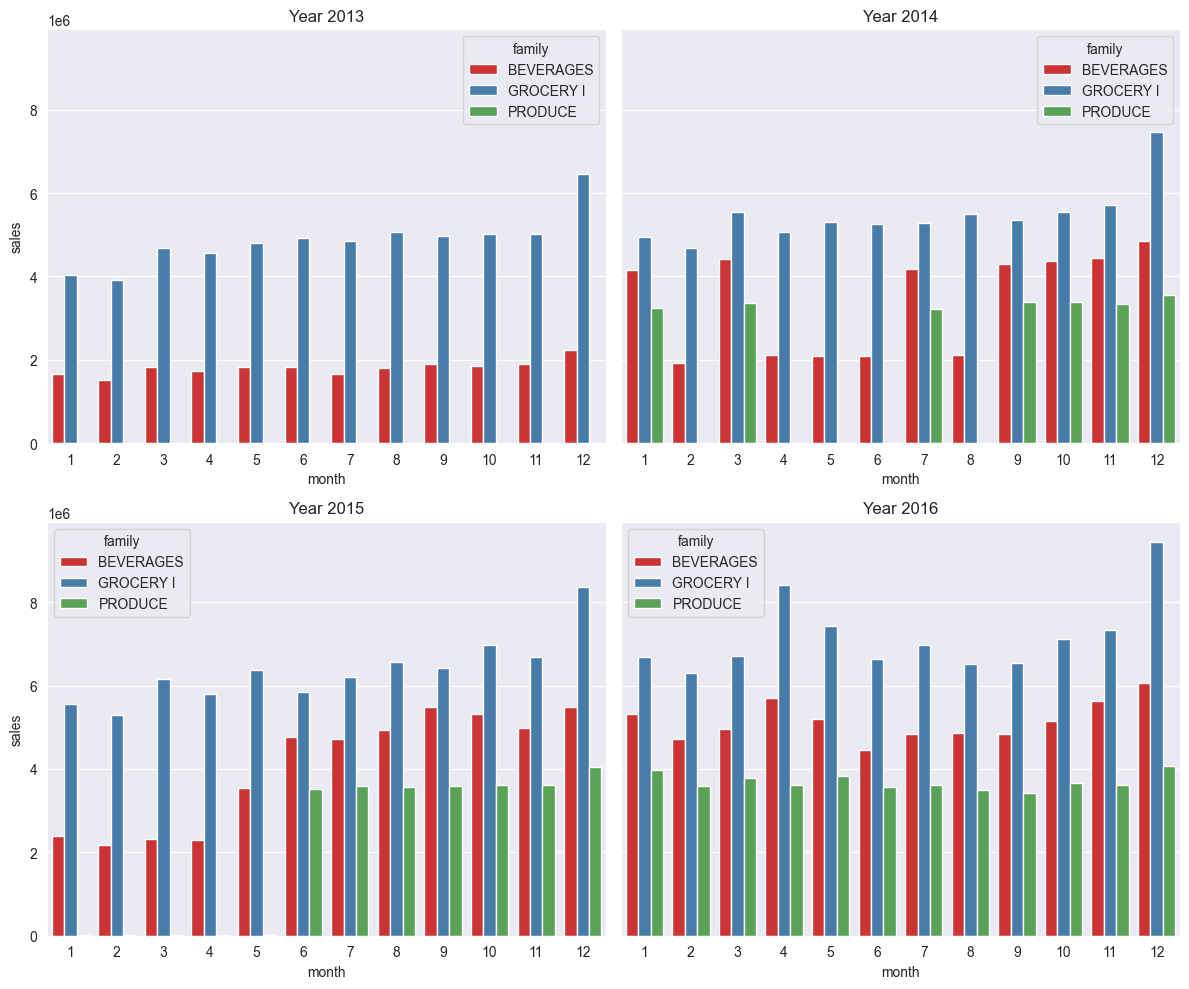

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_family_best' is your DataFrame
# Assuming 'year', 'month', 'sales', and 'family' are columns in your DataFrame

# Filter data for the years 2013 to 2016
years = [2013, 2014, 2015, 2016]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Loop through each year and plot
for i, year in enumerate(years):
    viz_year = train_family_best[train_family_best["year"] == year]
    
    # Calculate subplot position
    row = i // 2
    col = i % 2
    
    # Plot for the current year
    sns.barplot(x="month", y="sales", hue="family", data=viz_year, palette="Set1", ax=axes[row, col])
    axes[row, col].set_title(f'Year {year}')

# Adjust layout
plt.tight_layout()
plt.show()


Key Points : 

1. if we see "GROCERY I" family has increase sales from November to December
2. we can see "BEVERAGES" family can increase sales that depends on the events like in 2014 there are world cup and carnavales
3. there is something wrong with the "PRODUCE" family and we will see in the bar plot below. which is fluctuatif except in 2016

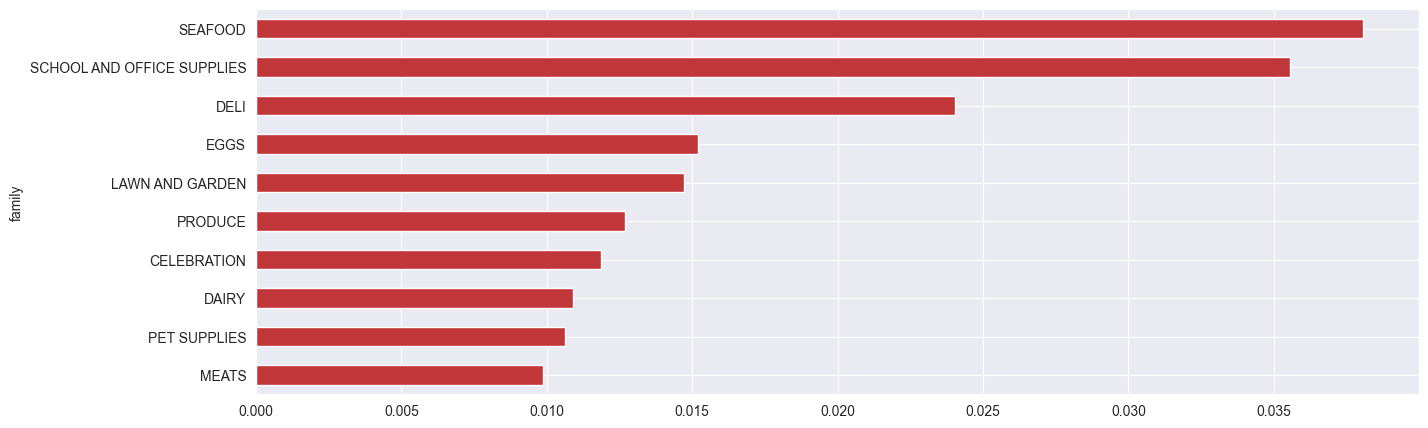

In [ ]:
train_merge.groupby("family")["psr"].mean().sort_values(ascending=False).head(10).plot(kind="barh", figsize=(15, 5)).invert_yaxis()

dataframe that show family that have highest psr or promotional sales ratio or onpromotion/sales for each store

In [ ]:
store_family_html = store_family.loc[store_family.groupby("store_nbr")["psr"].idxmax()]

display_data(store_family_html)

Key Points : 

There are theree important family in store because that still can give sales even though there is small promotion which are "SEAFOOD", "DELI", and "SCHOOL AND OFFICE SUPPLIES"

In [322]:
from IPython.core.display import display, HTML

def display_data(data):
    html_content = f'<div style="max-height: 200px; overflow-y: scroll;">{data.to_html()}</div>'
    return display(HTML(html_content))


In [379]:
train_merge["dcoilwtico"] = train_merge["dcoilwtico"].fillna(method="ffill")

In [382]:
corr = train_merge.groupby(["day","month", "year","family"]).agg({"sales" : sum, "onpromotion" : sum, "dcoilwtico" : np.mean}).reset_index()

In [388]:
corr["date"] = pd.to_datetime(corr[["year", "month", "day"]])
corr.set_index("date", inplace=True)

corr.drop(["day", "month", "year"], axis=1, inplace=True)

In [ ]:
sns.scatterplot(x="dcoilwtico", y="sales", hue="family", data=corr, palette="Set1")

In [400]:
from scipy.stats import pearsonr

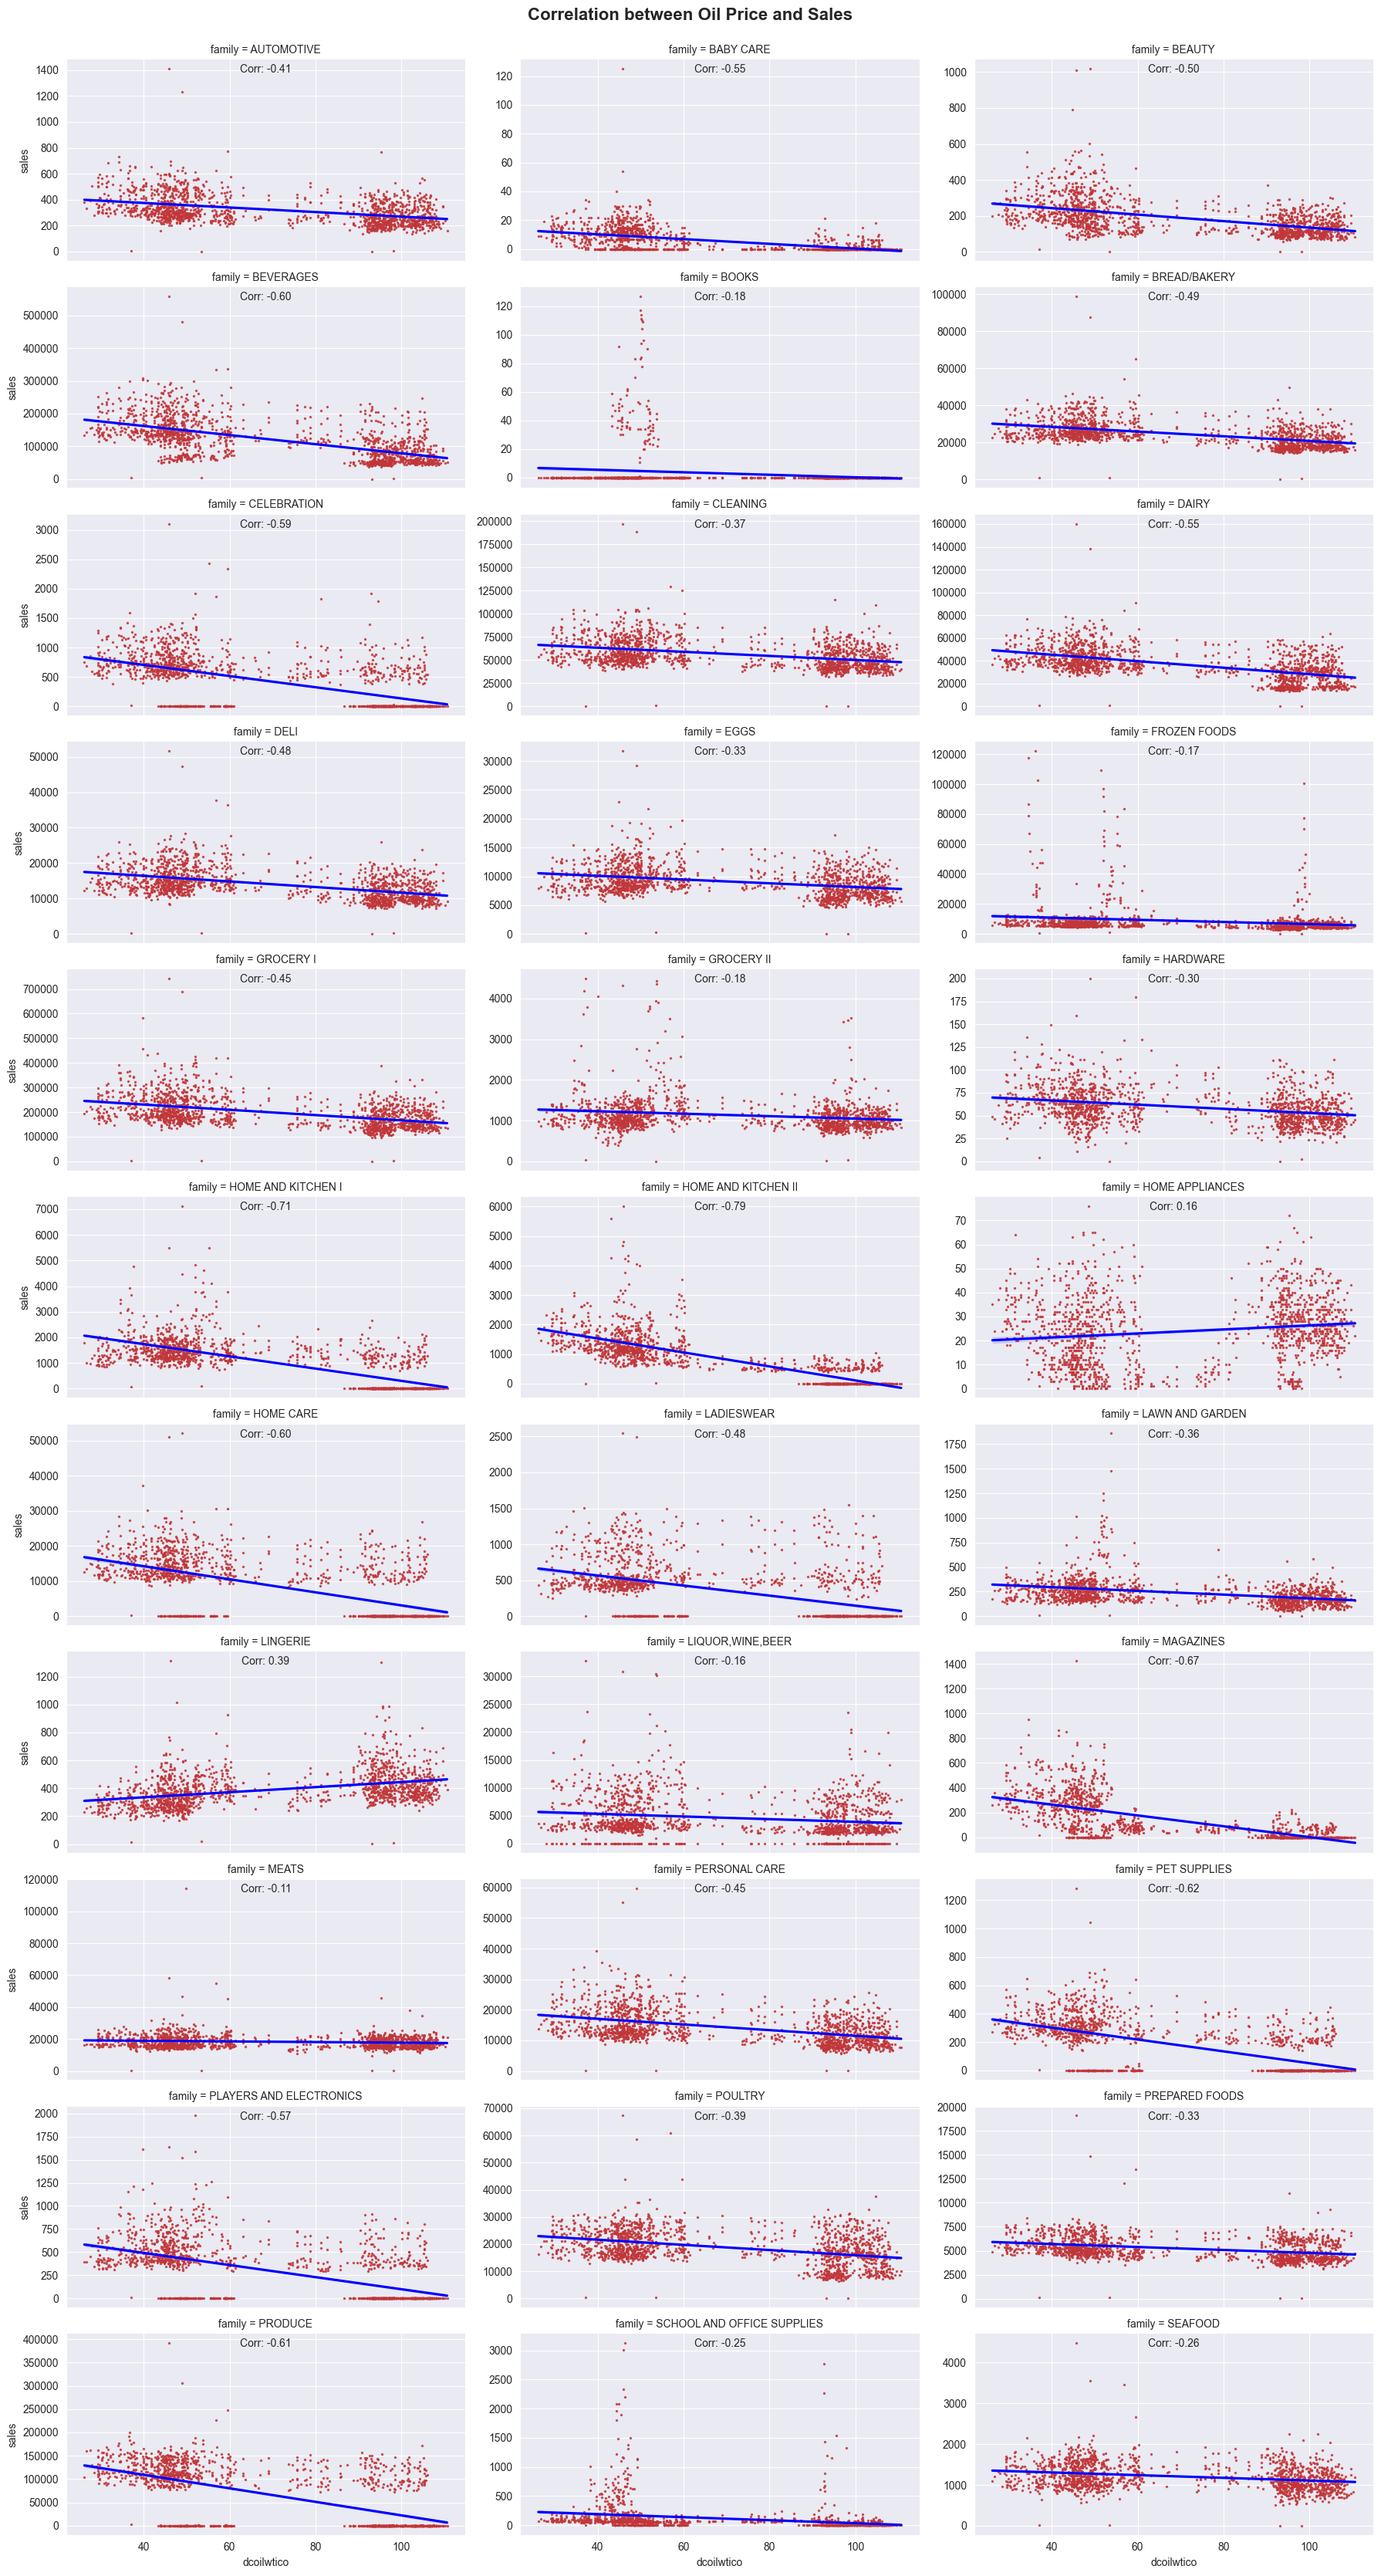

In [428]:
g = sns.lmplot(x="dcoilwtico", y="sales", data=corr, col="family", height=3, aspect=2, col_wrap=3, sharey=False, line_kws={'color': 'blue'}, scatter_kws={'s': 2})

def annotate_corr(x, y, **kwargs):
    corr_coeff, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.text(0.5, 0.95, f'Corr: {corr_coeff:.2f}', transform=ax.transAxes, ha='center', va='center')

g.map(annotate_corr, "dcoilwtico", "sales")

plt.suptitle("Correlation between Oil Price and Sales", y = 1.01, fontsize = 16, fontweight = "bold")

plt.show()

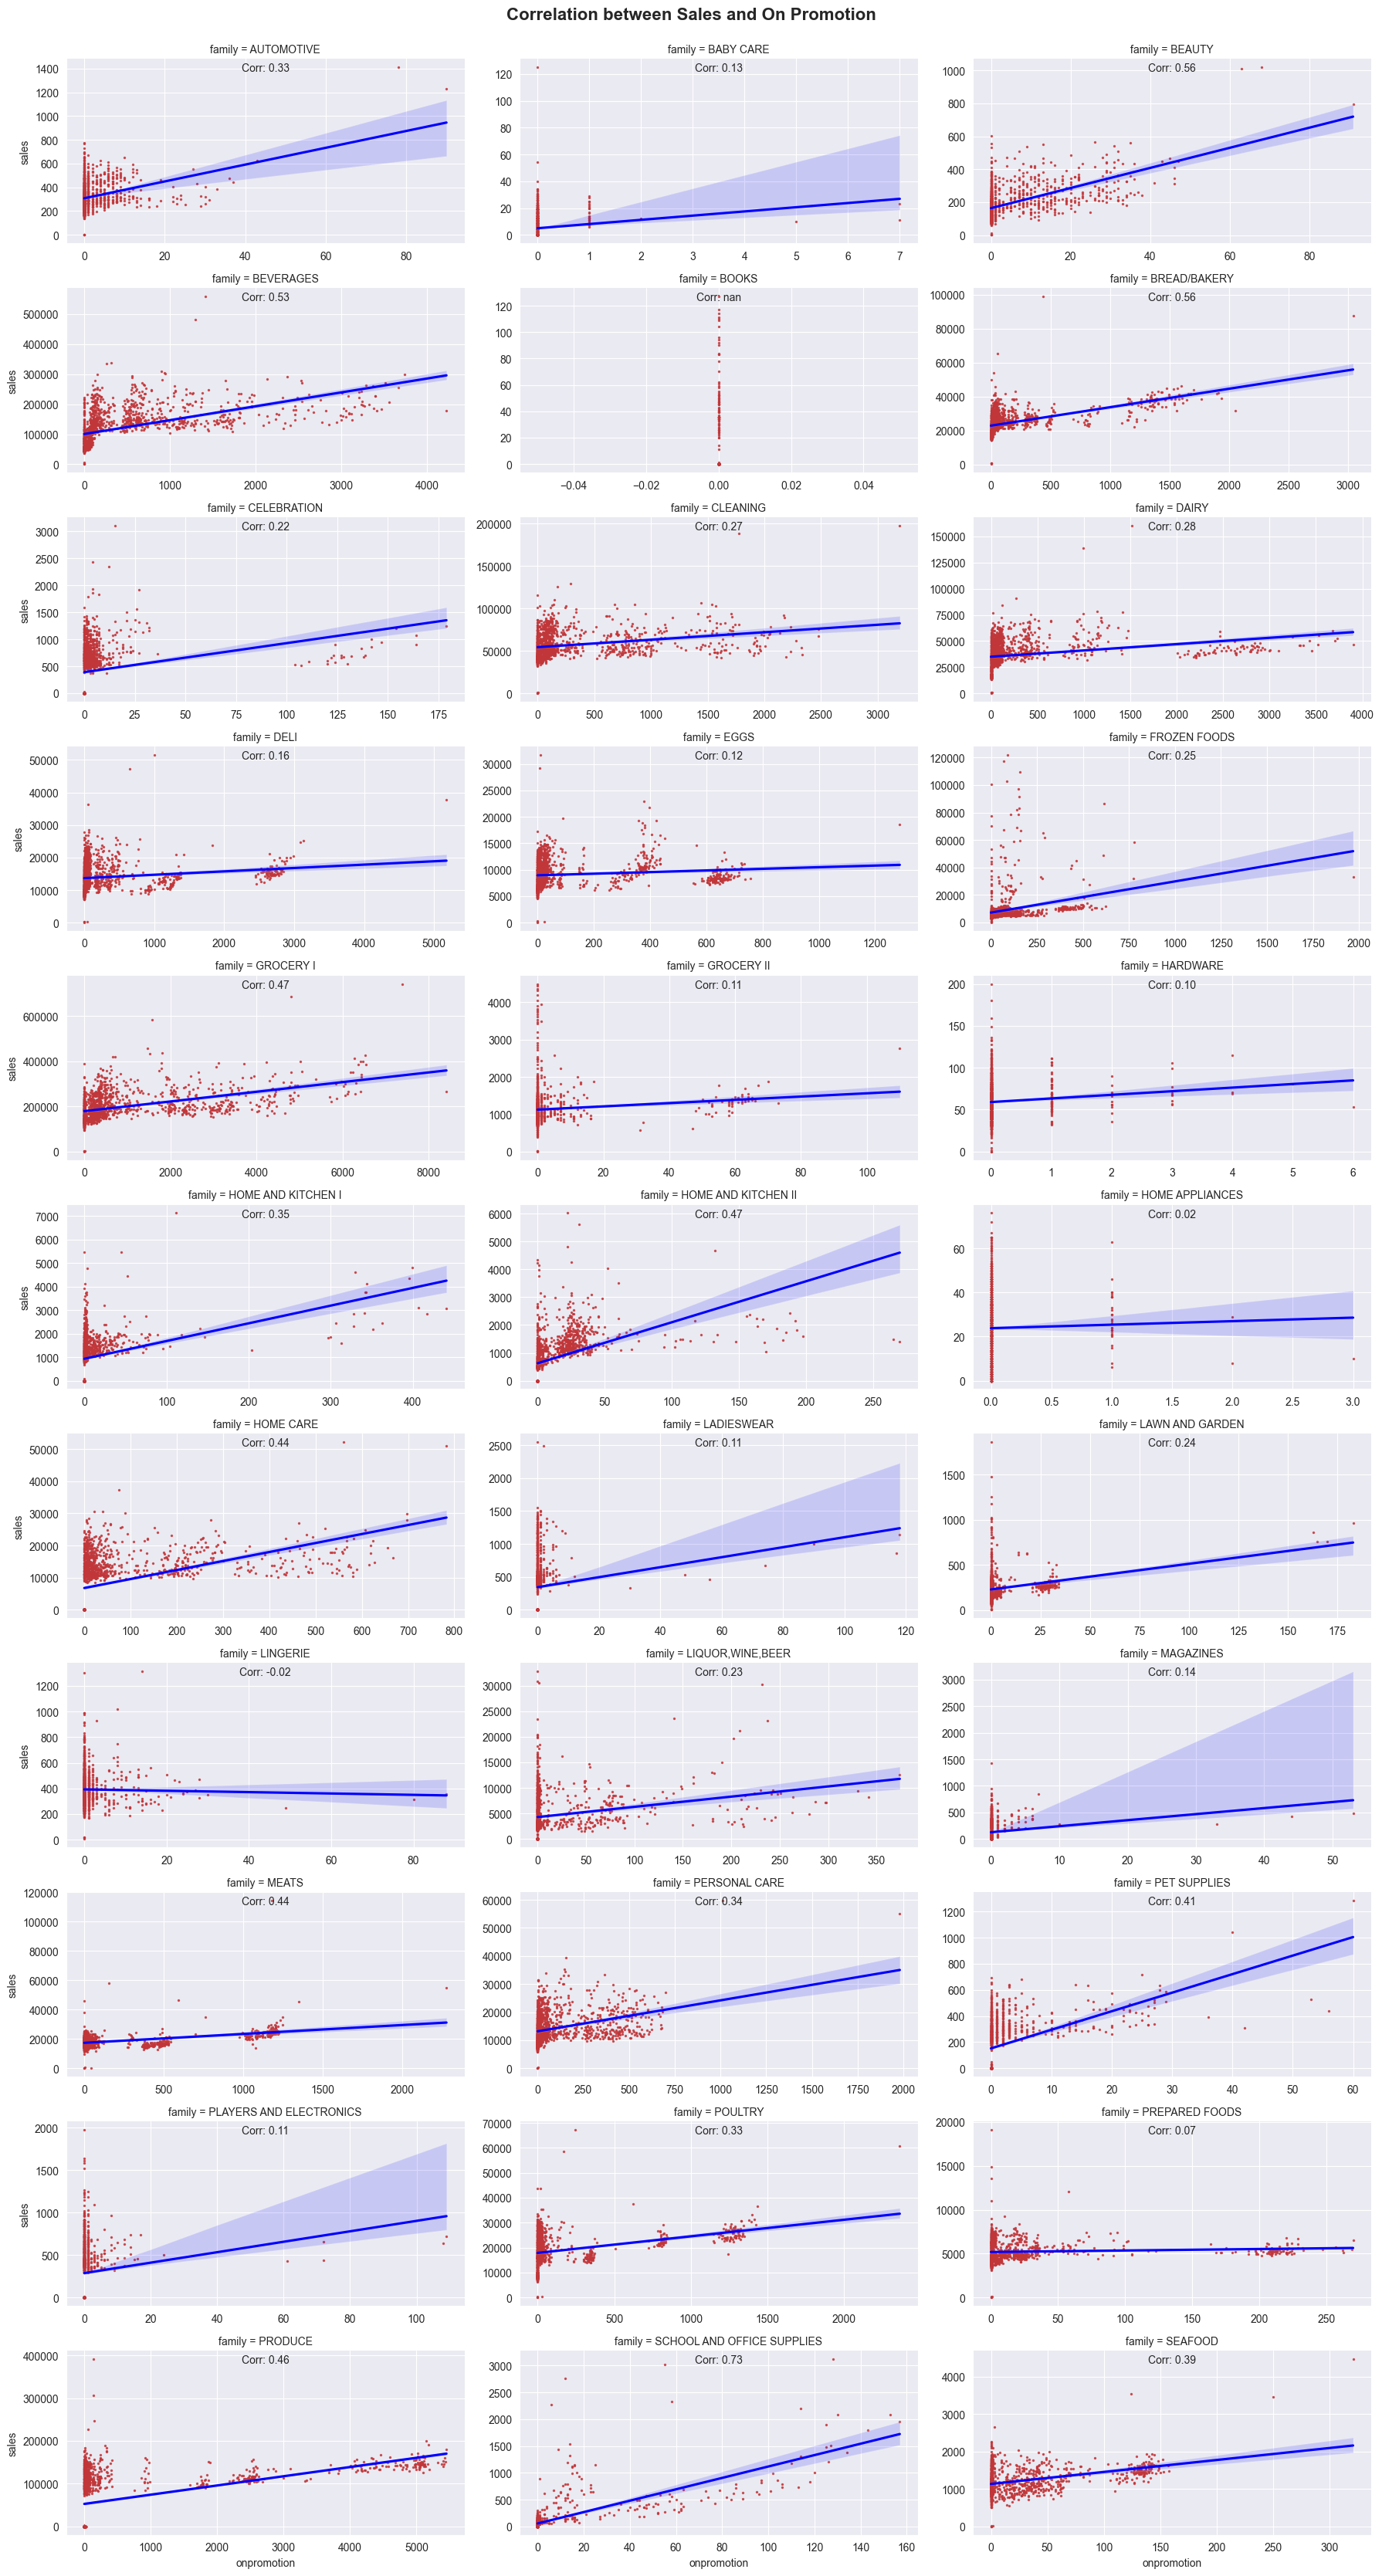

In [430]:
g = sns.lmplot(x="onpromotion", y="sales", data=corr, col="family", height=3, aspect=2, col_wrap=3, sharey=False, line_kws={'color': 'blue'}, scatter_kws={'s': 2}, sharex=False)

def annotate_corr(x, y, **kwargs):
    corr_coeff, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.text(0.5, 0.95, f'Corr: {corr_coeff:.2f}', transform=ax.transAxes, ha='center', va='center')

g.map(annotate_corr, "onpromotion", "sales")

plt.suptitle("Correlation between Sales and On Promotion", y=1.01, fontisize = 16, fontweight = 'bold')

plt.show()

from numpy import negative


Key Points : 

we will see the correalation between sales and oil price, and sales and onpromotion for each family

1. Sales and Oil Price has a negative correlation. There are some family that has a strong negative correlation such as HOME KITCHEN, MAGAZINES, PET SUPPLIES
2. Sales and On Promotion has a positive correlation. There are some family that has a strong positive correlation such as OFFICE SUPPLIES, BEAUTY, BREAD/BAKERY

#### Percentage change sales 2013 to 2016 

In [545]:
store_family_nbr = train_merge.groupby(["family", "store_nbr", "year"]).agg({"sales":sum, "onpromotion" : sum}).reset_index()

In [546]:
store_family_nbr = store_family_nbr.query("year == 2013 or year == 2016")

In [548]:
store_family_nbr["pct_change"] = store_family_nbr["sales"].pct_change()*100

store_family_nbr.loc[store_family_nbr["year"] == 2013, "pct_change"] = 0

In [525]:
family_pct_change = store_family_nbr.query("year == 2016")
family_pct_change["pct_change"] = family_pct_change["pct_change"].apply("{:.2f}".format).astype(float)
family_pct_change = family_pct_change.query("(pct_change != inf) and (pct_change != 0)")
family_pct_change.dropna(inplace=True)

display_data(family_pct_change)

Below is dataframe that has the highest percentage change in sales in 2016 compared to 2013

so, we can see which store for each family has the highest percentage change in sales in 2016 compared to 2013. In Example AUTOMATIVE in store number 3

In [552]:
display_data(family_pct_change.loc[family_pct_change.groupby("family")["pct_change"].idxmax()])

#### Store Number

In [555]:
store_nbr = train_merge.groupby(["store_nbr", "year"]).agg({"sales":sum, "onpromotion" : sum}).reset_index()

In [556]:
store_nbr = store_nbr.query("year == 2013 or year == 2016")

In [557]:
store_nbr["pct_change"] = store_nbr["sales"].pct_change()*100

store_nbr.loc[store_nbr["year"] == 2013, "pct_change"] = 0

In [558]:
store_pct_change = store_nbr.query("year == 2016")
store_pct_change["pct_change"] = store_pct_change["pct_change"].apply("{:.2f}".format).astype(float)
store_pct_change = store_pct_change.query("(pct_change != inf) and (pct_change != 0)")
store_pct_change.dropna(inplace=True)

display_data(store_pct_change)

below we can see percentage change of sales in 2016 compared to 2013 for each store. In example Store Number 39 and 49 have the pct change are 238 and 204 respectively. This means that the sales in 2016 are 238% and 204% higher than in 2013.

In [560]:
display_data(store_pct_change.loc[store_pct_change.groupby("store_nbr")["pct_change"].idxmax()])

##### store with sales 0

In [275]:
store_family = train_merge.groupby(["store_nbr", "family"])["sales"].sum().reset_index()

In [290]:
store_family = train_merge.groupby(["store_nbr", "family"]).agg({"sales" : sum, "psr" : sum}).reset_index()


below is family that dont sell in store. So we can drop later to help us when we do forecasting

In [569]:
zero_sales = store_family.query("sales == 0")
display_data(zero_sales)

we need to drop later for zero sales store